In [1]:
import pandas as pd
from IPython.display import display, HTML
%load_ext autoreload
%autoreload 2

import importlib

In [2]:
csv_file = open("uaScoresDataFrame.csv")
scores = pd.read_csv(csv_file)
scores = scores.drop('id', axis=1)
scores = scores.drop('Venture Capital', axis=1)

In [3]:
def check_zero(dataset):
    invalid_rows = []
    for element in dataset.columns.tolist():
        invalid = dataset[dataset[element] == 0.0]
        invalid_rows.append(invalid[['UA_Name','UA_Country']])
    df = pd.concat(invalid_rows).reset_index(drop=True).value_counts()
    return df
results = check_zero(scores).to_frame().reset_index().rename(columns={0:"number"})
print(results)

                       UA_Name               UA_Country  number
0                      Andorra                  Andorra       6
1                    Gibraltar                Gibraltar       5
2                      Managua                Nicaragua       3
3                     Tashkent               Uzbekistan       3
4                  Belize City                   Belize       3
5                       Panama                   Panama       3
6                    Palo Alto               California       2
7                       La Paz                  Bolivia       2
8                     Portland                    Maine       2
9                       Havana                     Cuba       2
10                     Fukuoka                    Japan       2
11                    San Juan              Puerto Rico       2
12                     Bozeman                  Montana       2
13                   Baltimore                 Maryland       2
14                    Valletta          

In [4]:
scores = scores[(scores != 0).all(1)]

In [5]:
weights_data = {
    'Housing' : 1.5,
    'Cost of Living' : 1.5,
    'Startups' : 0.5,
    'Business Freedom' : 0.8,
    'Safety' : 1.5,
    'Healthcare' : 1.5,
    'Education' : 0.5,
    'Travel Connectivity' : 1.5,
}

weights_vector = pd.Series(0.0, index=scores.columns[3:-1])
for i in range(len(weights_vector)):
    row_name = weights_vector.index[i]
    weights_vector[i] = weights_data.get(row_name, 1)

In [6]:
summable_values = list(scores)
if 'Naive Sum' in summable_values:
    summable_values.remove('Naive Sum')
weighted_scores = scores.copy()
weighted_scores = weighted_scores * weights_vector
scores['Naive Sum'] = weighted_scores[summable_values].sum(numeric_only=True, axis=1)

In [7]:
# scores['Naive Sum']
# better, worse

midpoint = scores['Naive Sum'].quantile()
scores['Label'] = ''
scores.loc[scores['Naive Sum'] < midpoint, 'Label'] = 'worse'
scores.loc[scores['Naive Sum'] >= midpoint, 'Label'] = 'better'
scores.drop(labels=['Startups', 'Business Freedom', 'Tolerance', 'Outdoors'], axis=1, inplace=True)

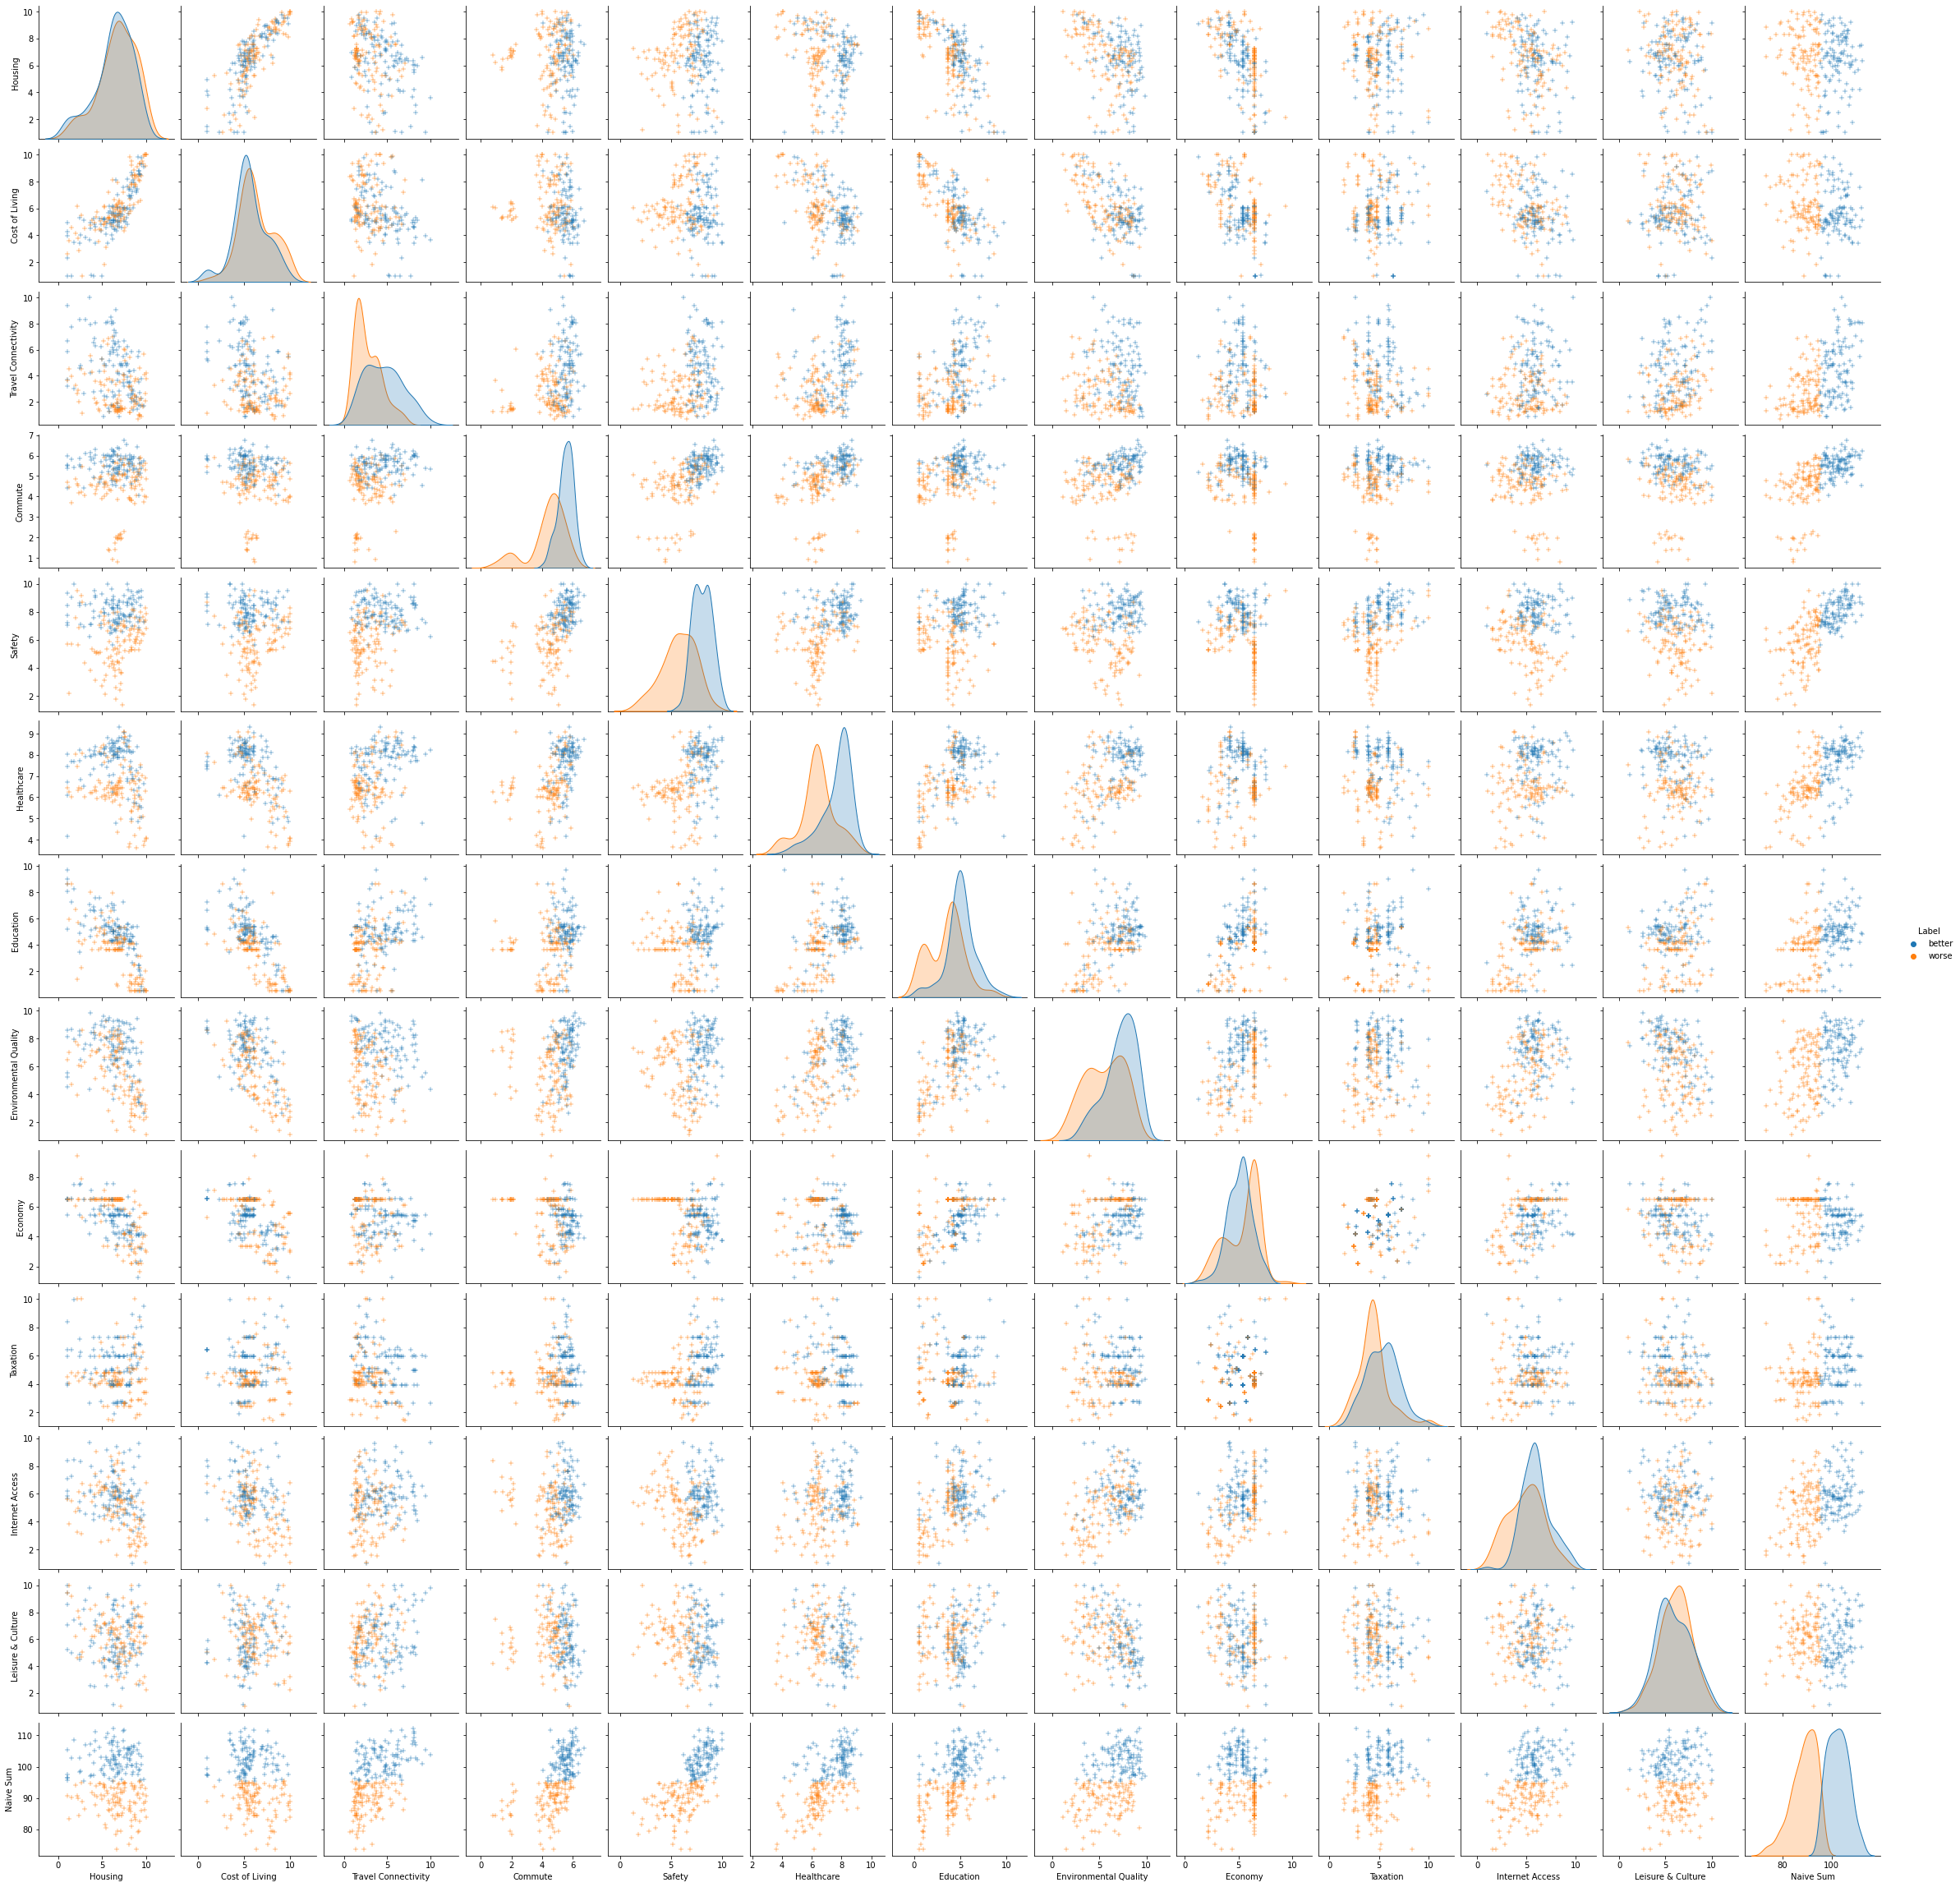

In [8]:
import seaborn as sns

sns.pairplot(scores, hue='Label', markers='+')

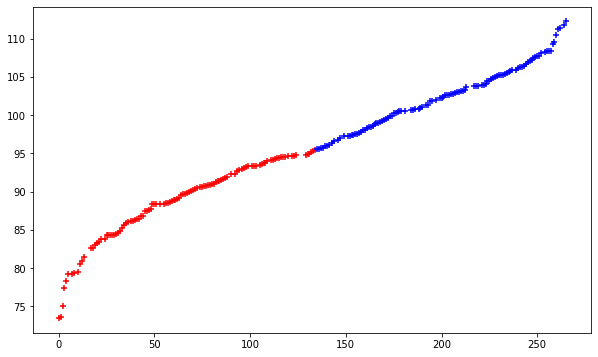

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
vals = scores['Naive Sum'].sort_values()
colors = np.where(vals >= midpoint, 'b', 'r')
ax.scatter(scores.index, vals, c=colors, marker='+')

In [10]:
from Modules.dataprocessing import ProcessingData
ProcessingData.normalize(scores)
a, b = ProcessingData.prepare_data(scores)

preview_table = pd.concat([a.head(), b.head()])

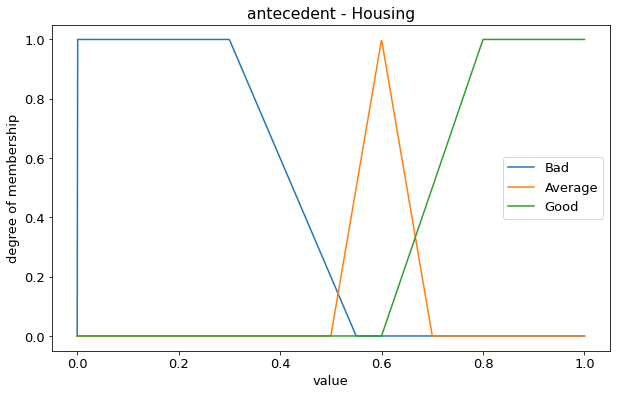

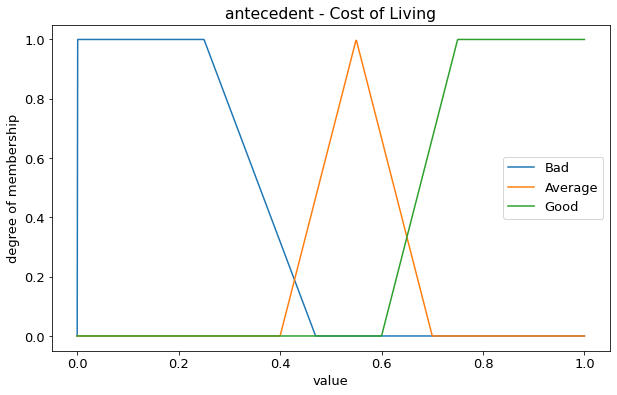

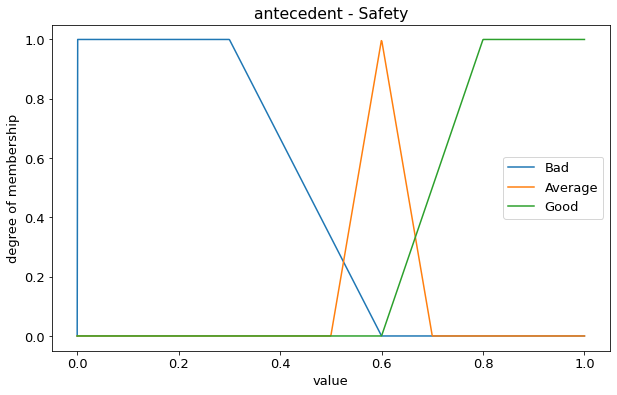

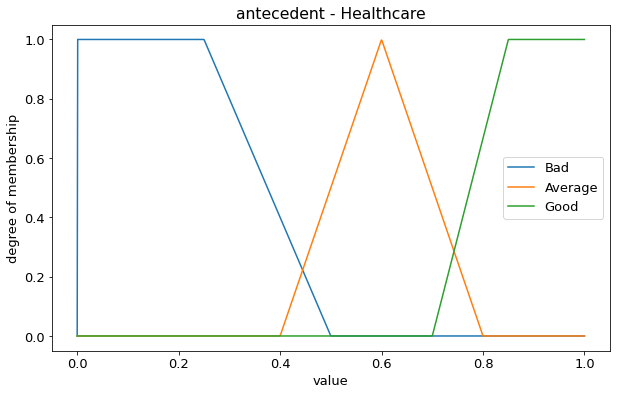

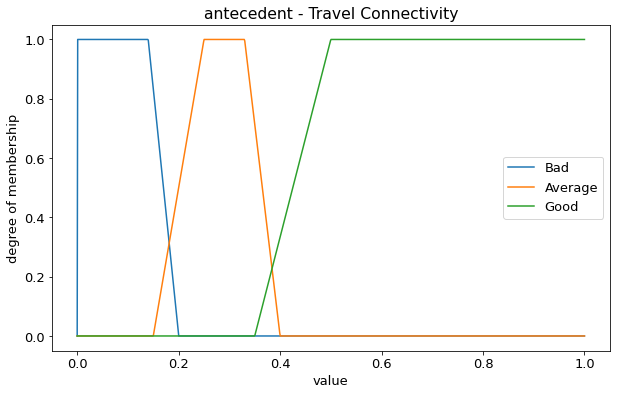

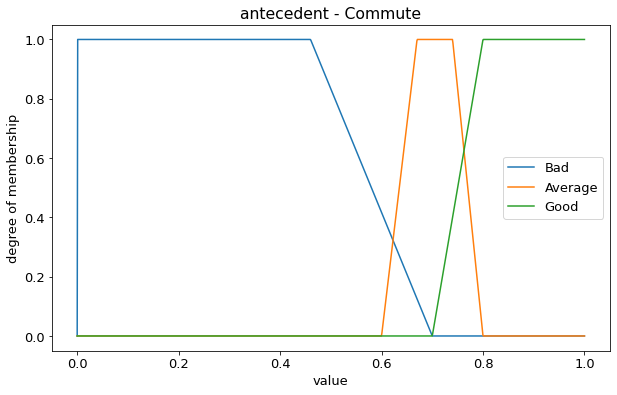

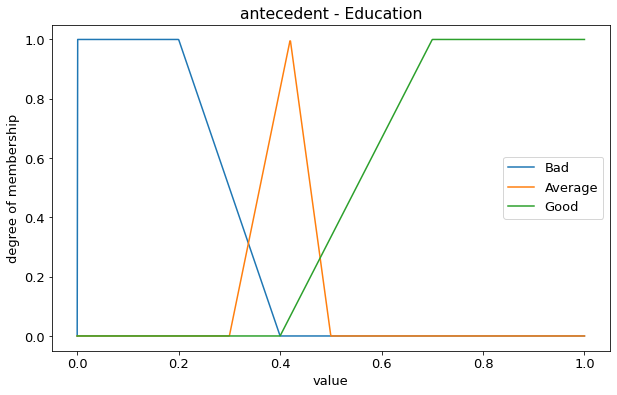

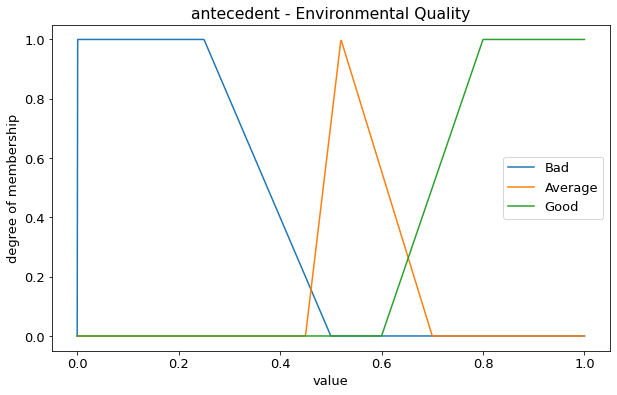

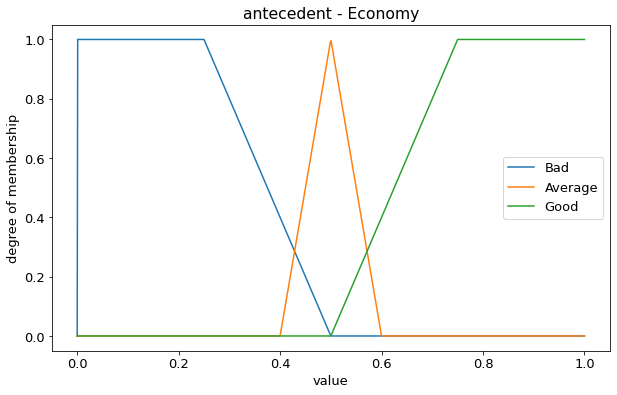

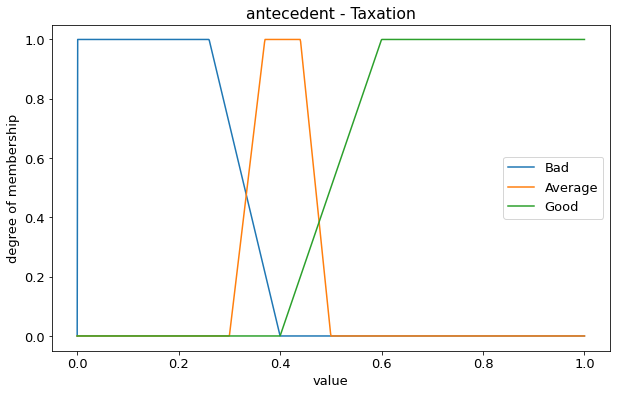

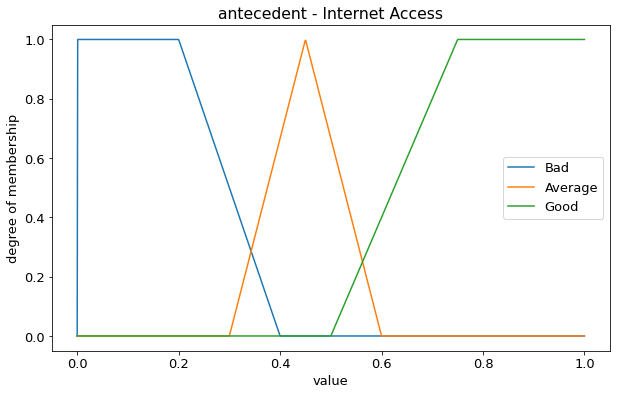

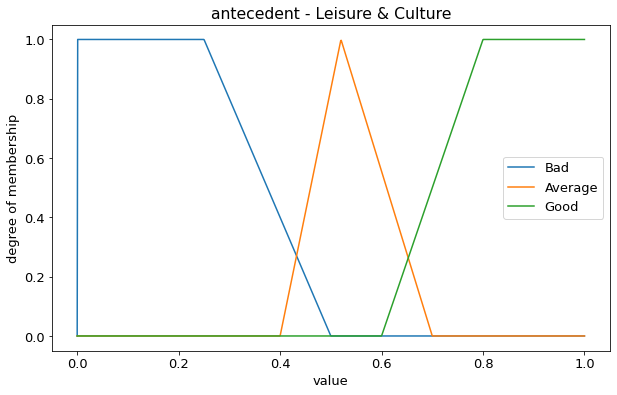

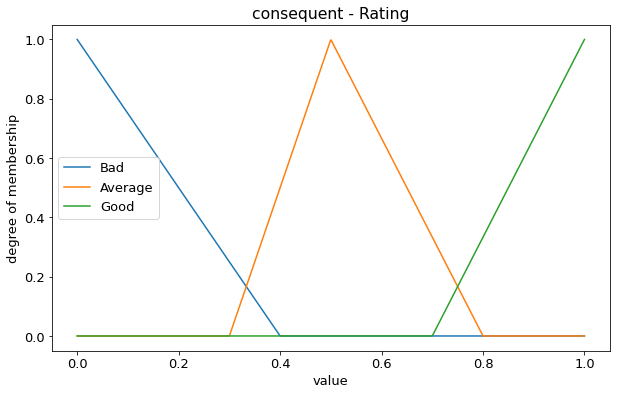

Nashville -> 14


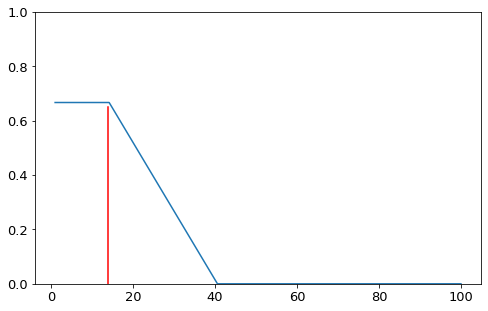

Saskatoon -> 54


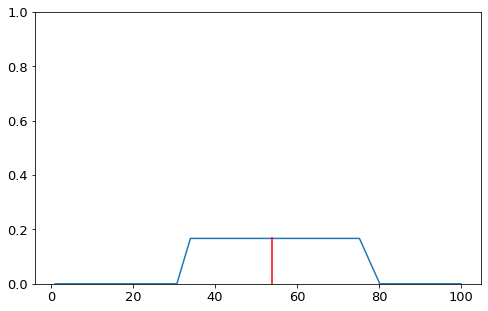

Valencia -> 89


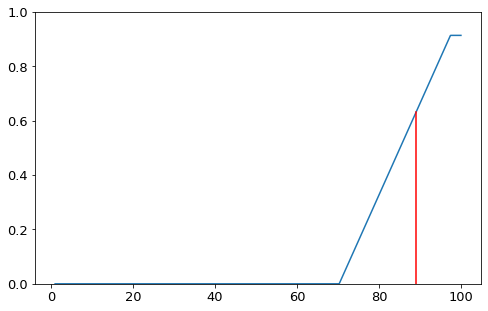

Santiago -> 54


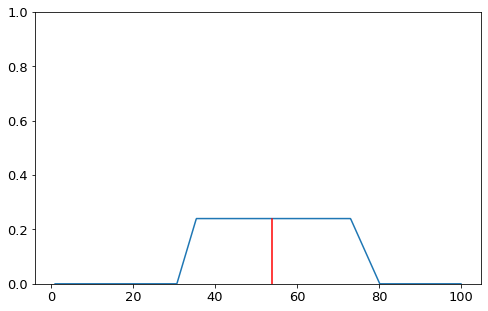

Santo Domingo -> 17


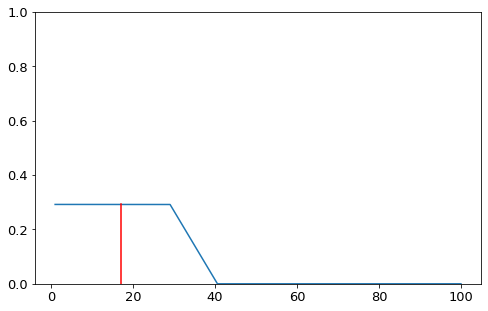

Chicago -> 16


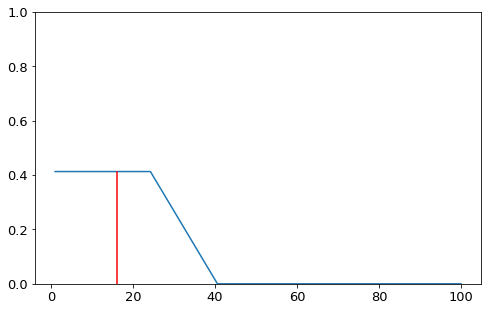

Kiev -> 89


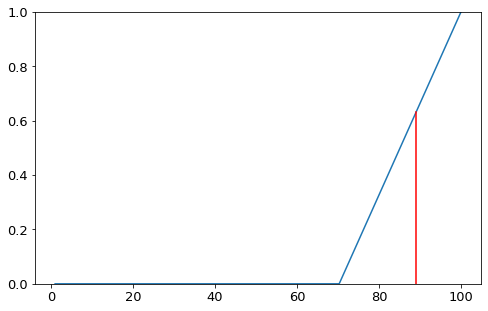

Nairobi -> 19


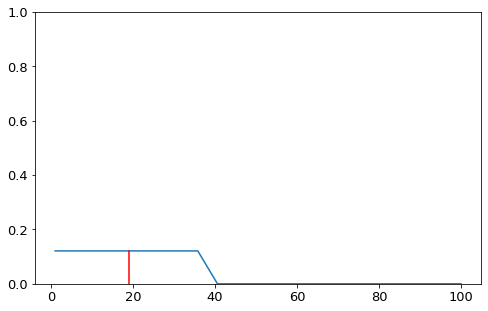

Johannesburg -> 17


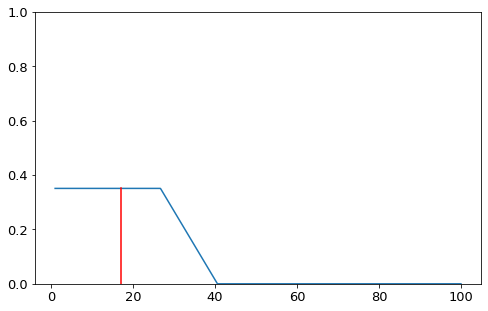

Medellin -> 89


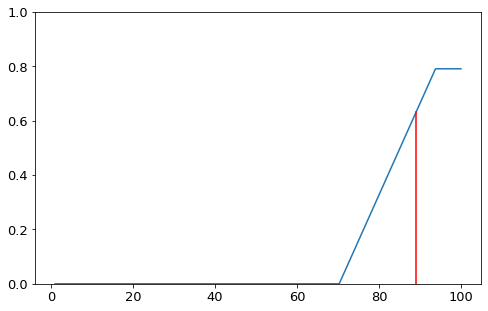

Colorado Springs -> 18


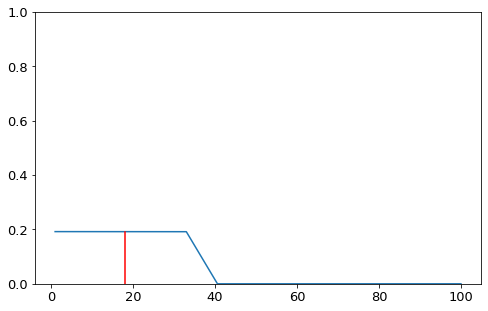

Toronto -> 85


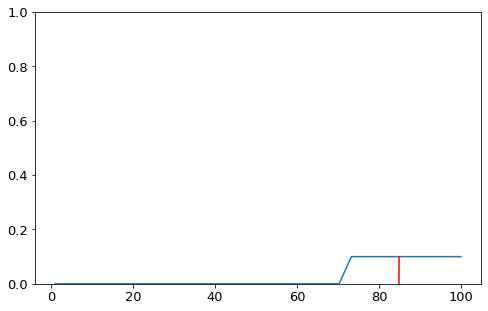

Louisville -> 0


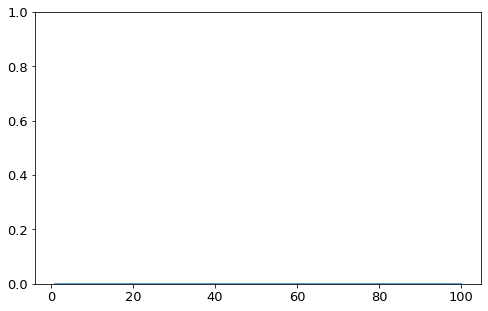

Malmo -> 86


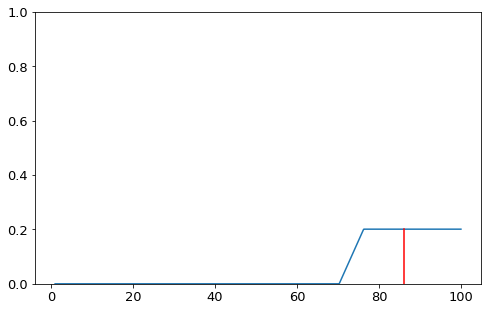

Albuquerque -> 0


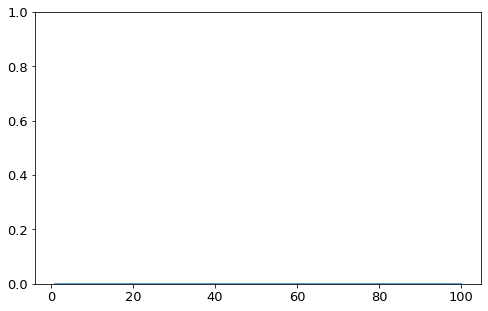

Lausanne -> 85


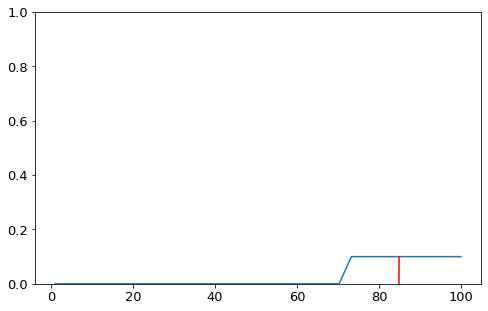

Thessaloniki -> 18


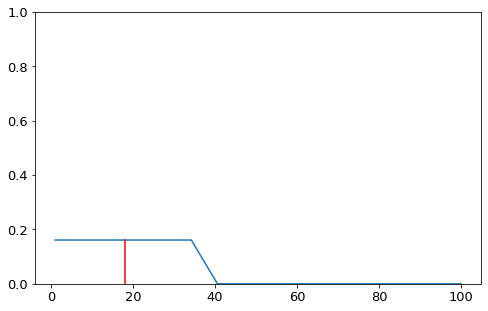

Houston -> 0


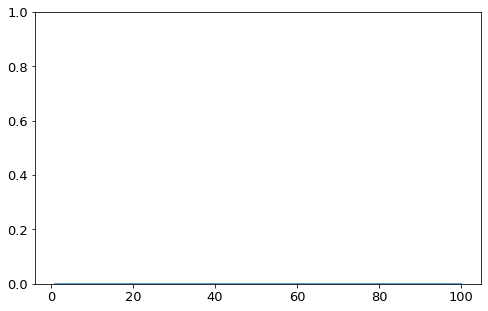

Singapore -> 89


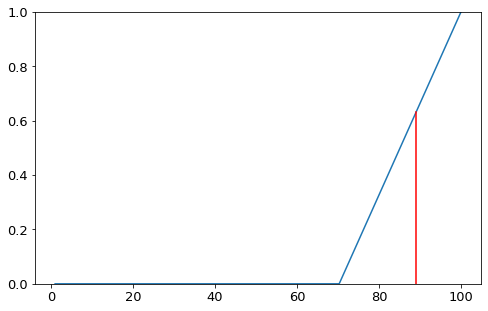

Toulouse -> 88


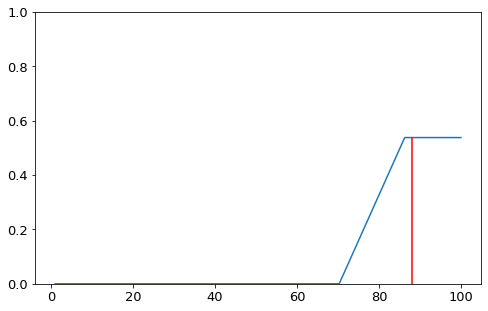

Turku -> 88


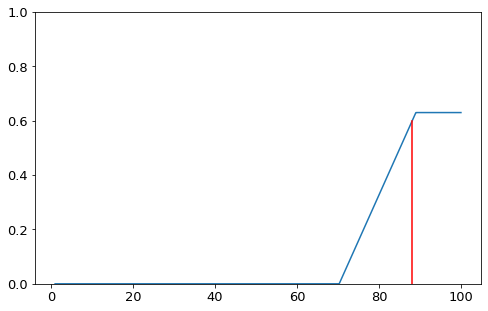

Chiang Mai -> 89


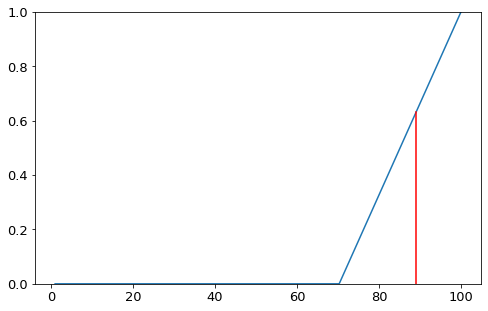

Ottawa -> 85


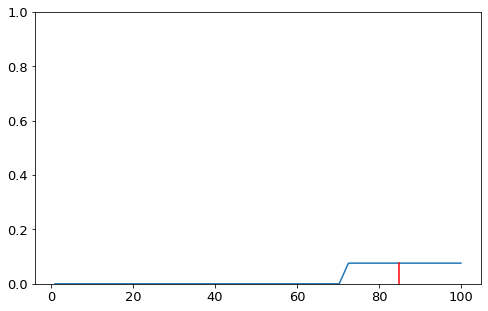

Warsaw -> 85


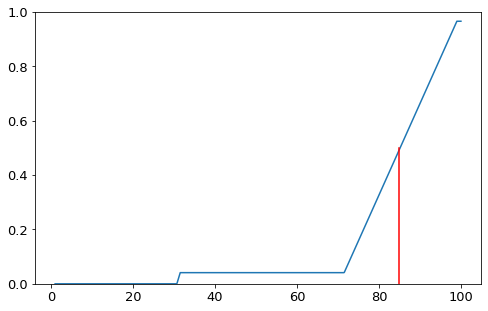

Utrecht -> 89


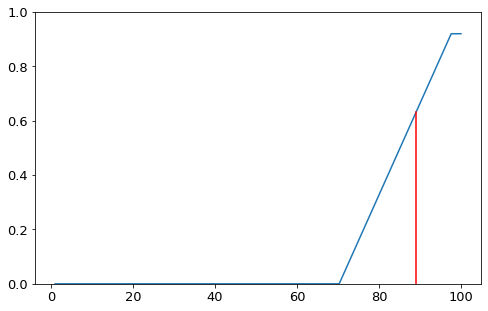

Chennai -> 89


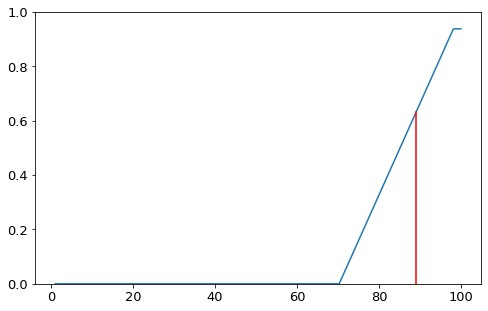

Moscow -> 89


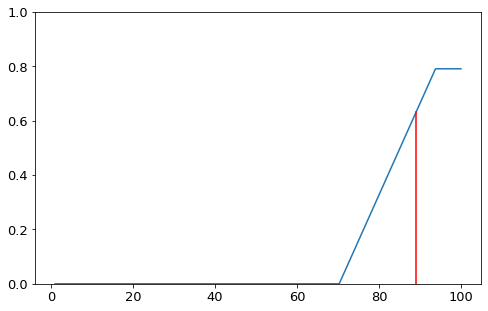

New York -> 0


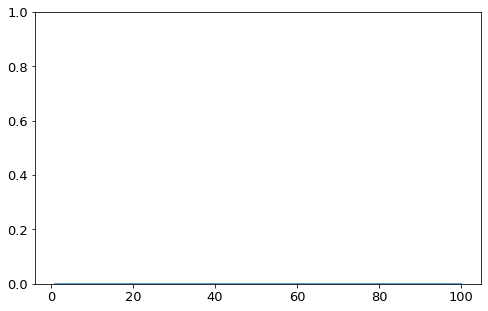

Sydney -> 0


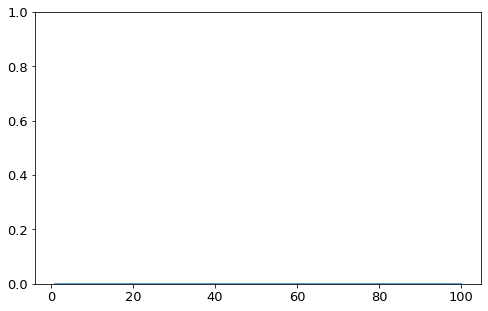

Tehran -> 14


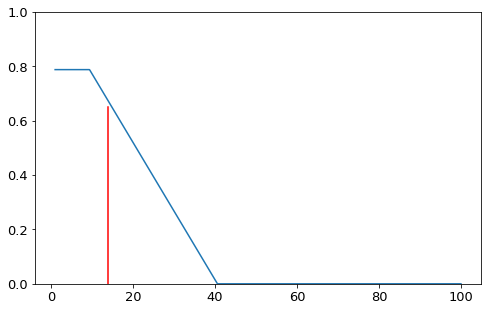

Salt Lake City -> 53


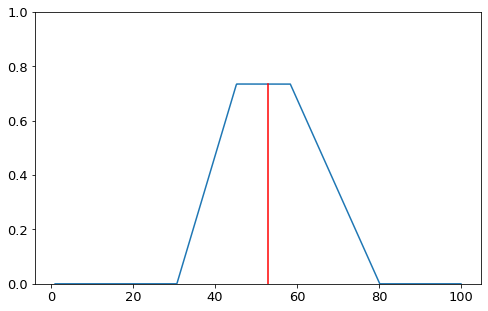

Chattanooga -> 54


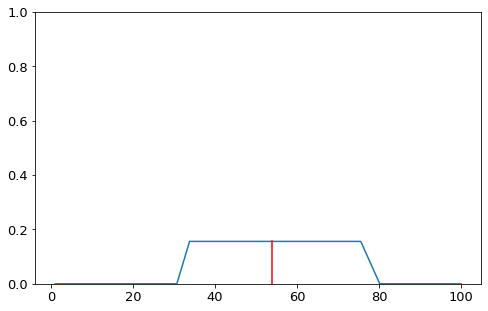

Naples -> 53


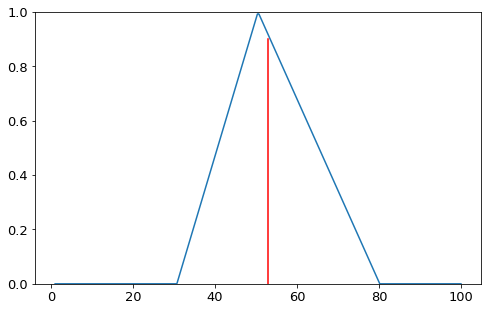

Bilbao -> 54


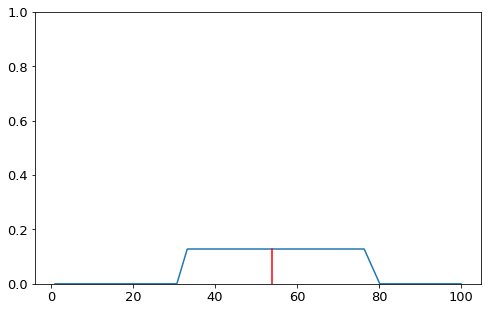

Milan -> 87


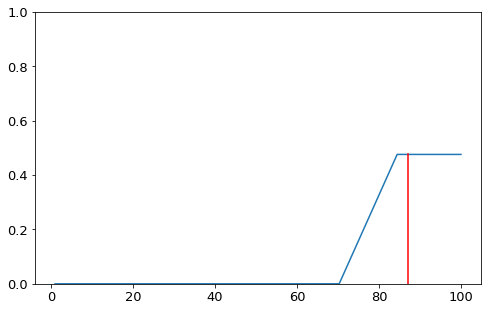

Marseille -> 88


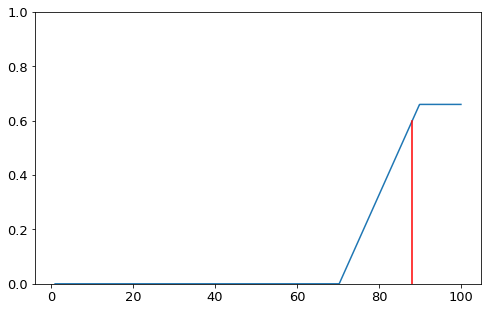

Calgary -> 54


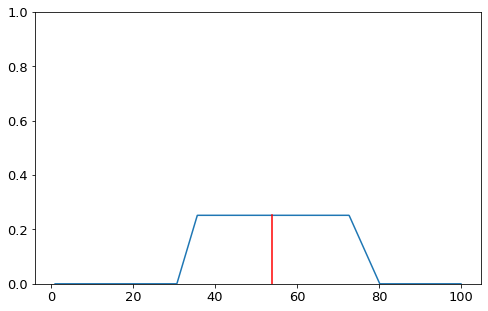

Hannover -> 89


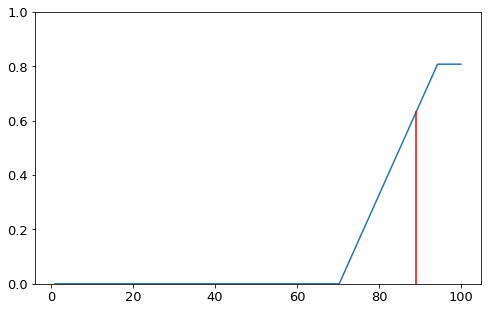

Tampa Bay Area -> 53


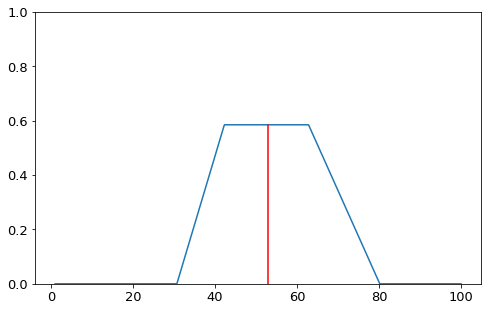

Mumbai -> 54


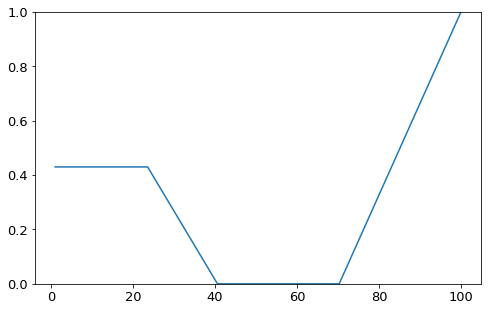

Memphis -> 13


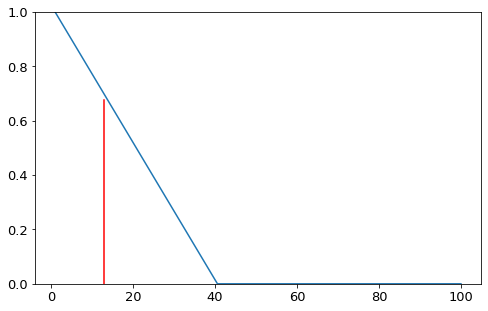

Berlin -> 86


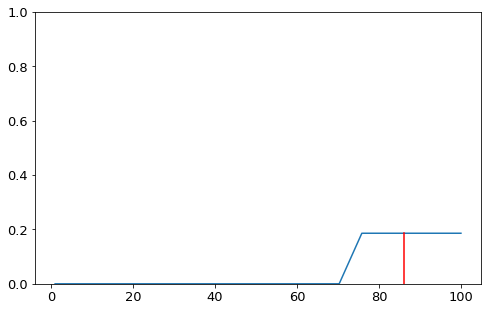

Cape Town -> 17


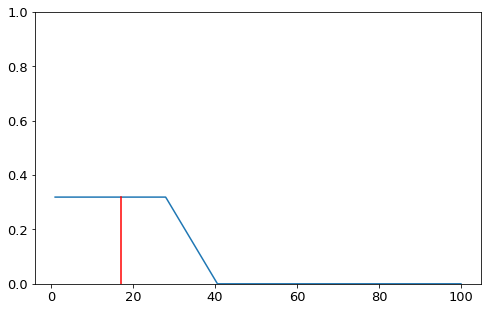

Leeds -> 88


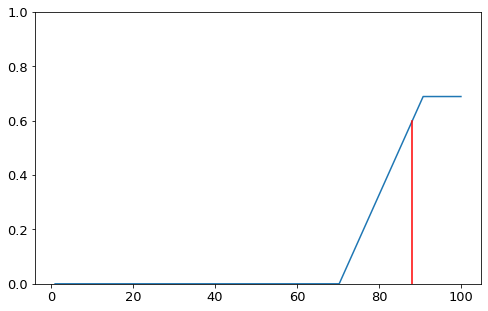

Zagreb -> 89


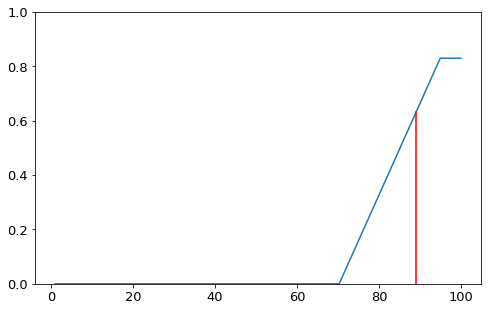

Washington -> 13


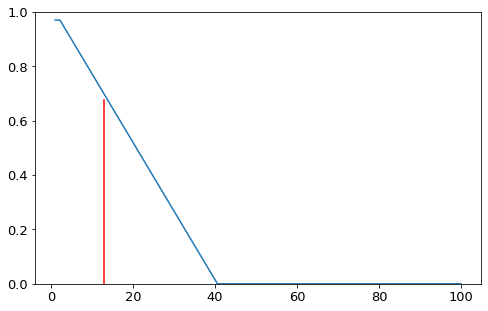

Lyon -> 87


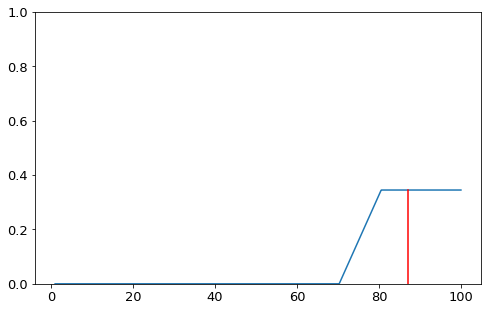

Bologna -> 86


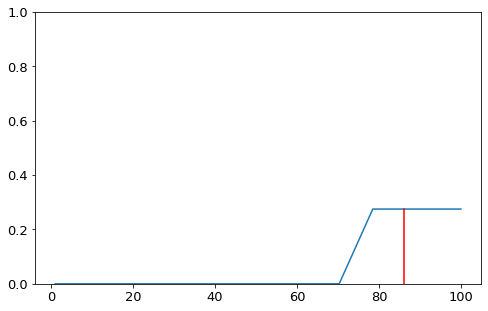

Seville -> 89


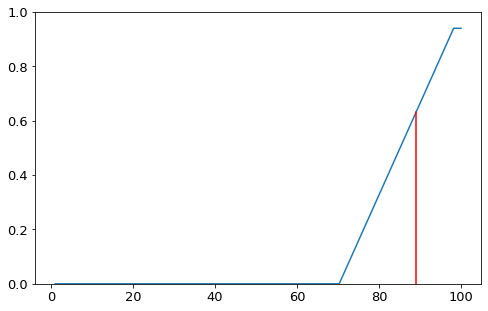

Boulder -> 54


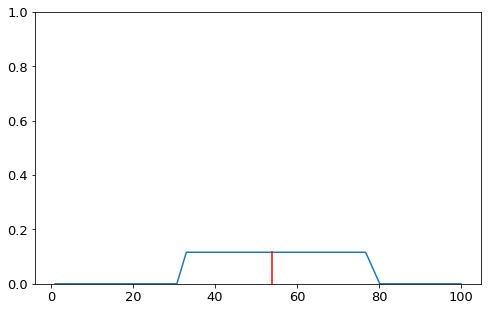

Turin -> 53


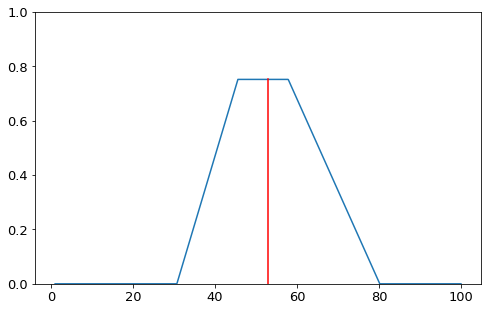

Stuttgart -> 86


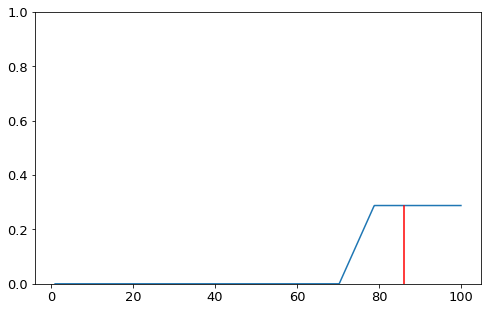

Karlsruhe -> 87


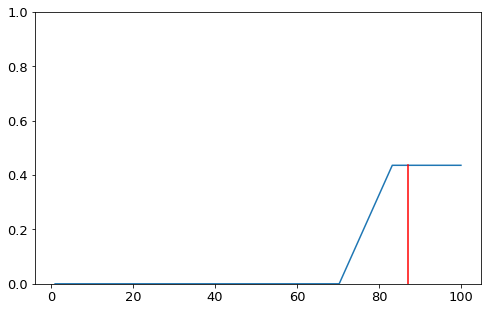

Bogota -> 18


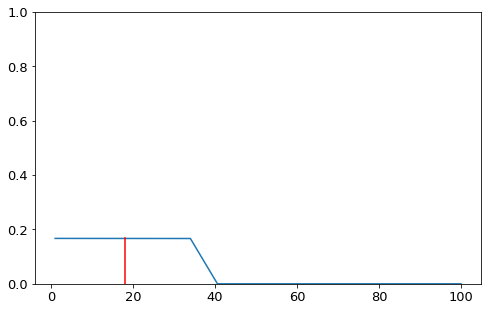

Portland -> 18


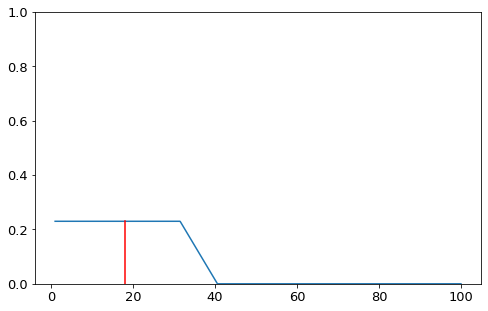

Lille -> 88


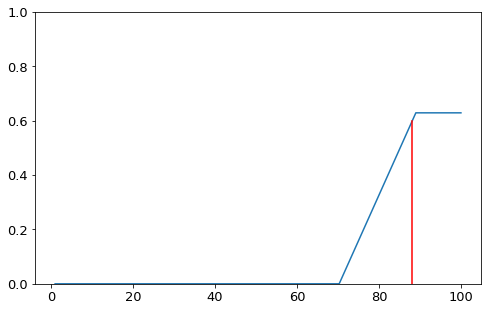

Geneva -> 0


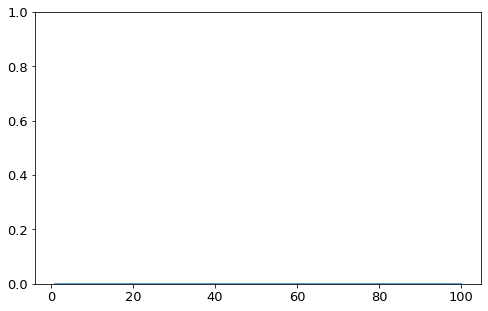

Minsk -> 89


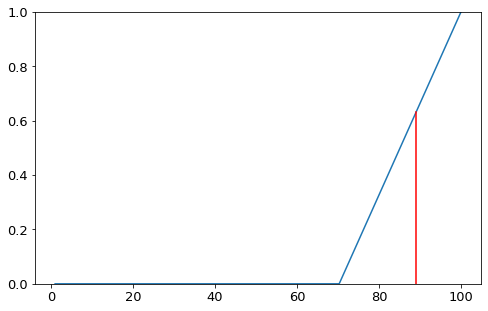

Amsterdam -> 87


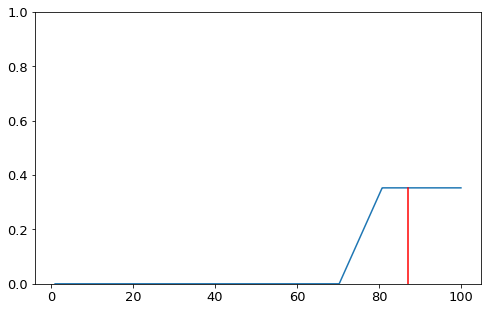

Dubai -> 0


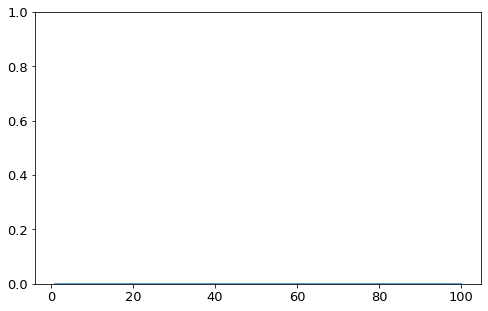

Cork -> 89


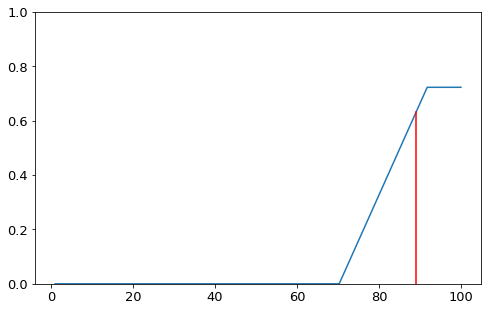

San Jose -> 54


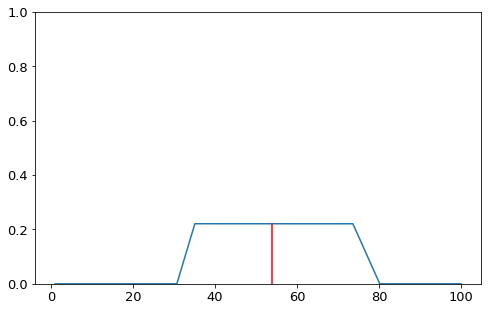

Victoria -> 54


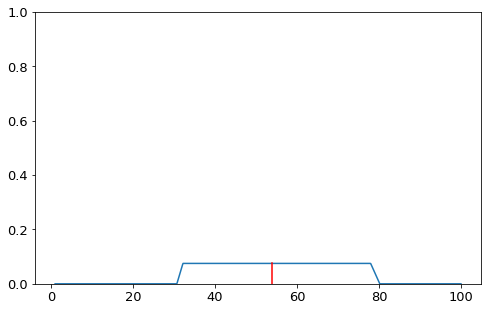

San Diego -> 53


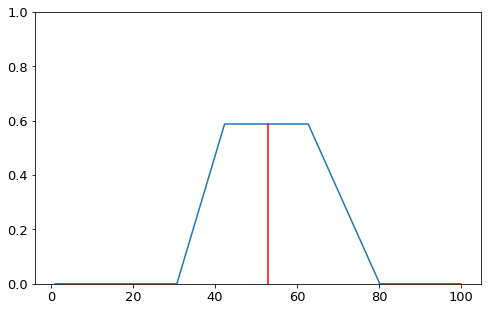

Omaha -> 0


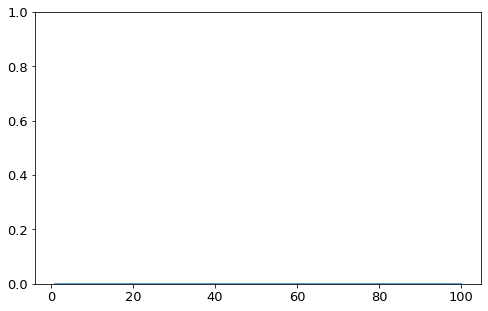

Shanghai -> 87


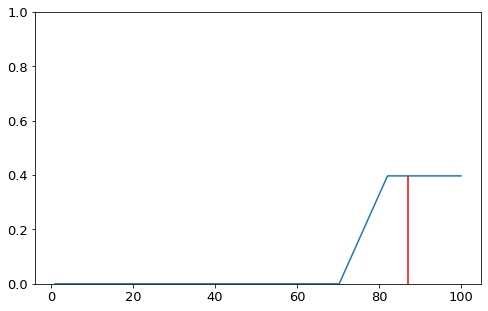

Seoul -> 89


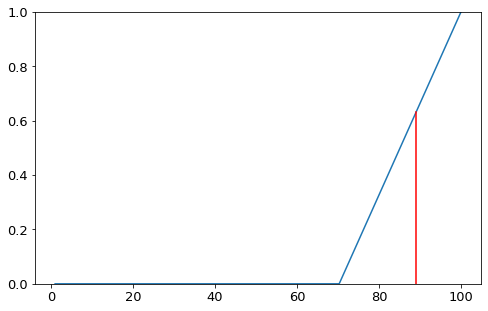

Bratislava -> 89


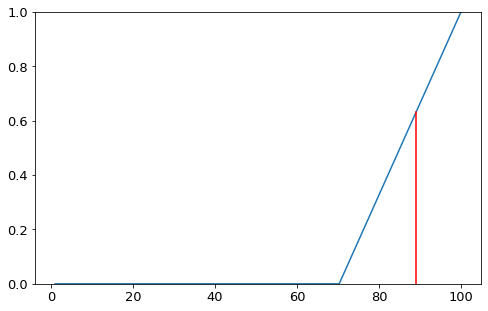

Lima -> 18


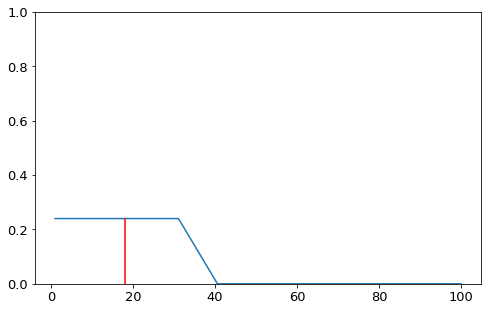

Halifax -> 84


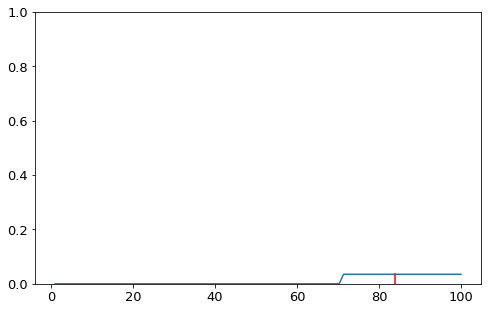

Barcelona -> 87


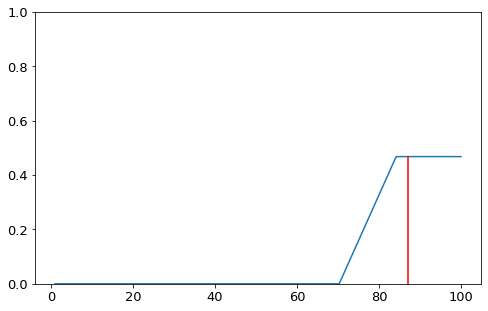

Knoxville -> 54


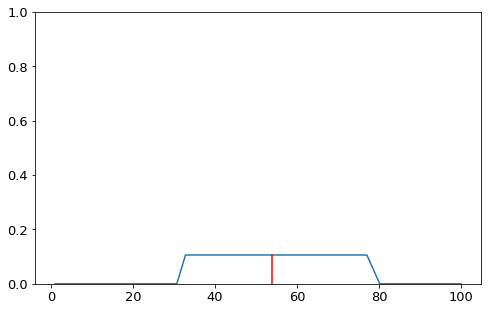

Malaga -> 89


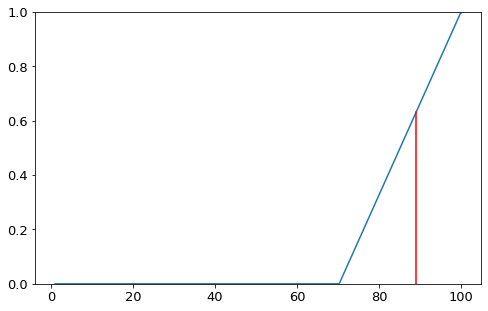

Cologne -> 53


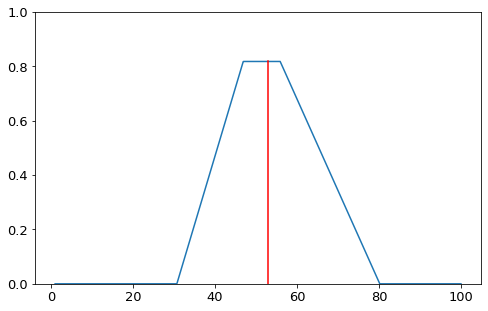

St. Louis -> 53


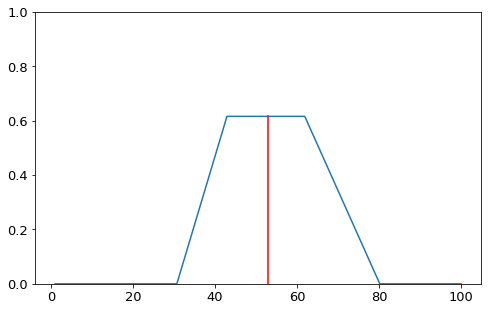

Dublin -> 86


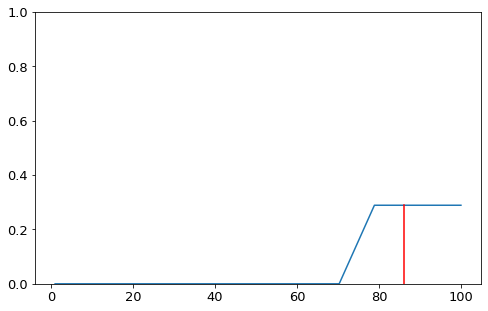

Montevideo -> 54


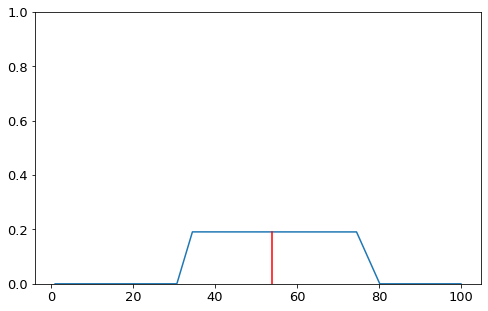

Krakow -> 89


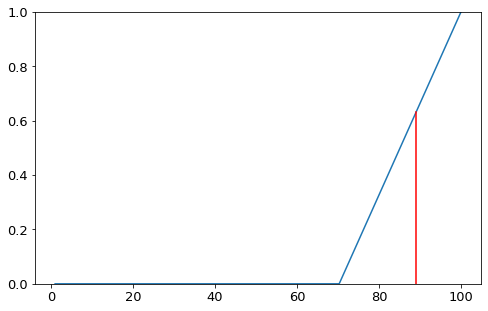

Skopje -> 88


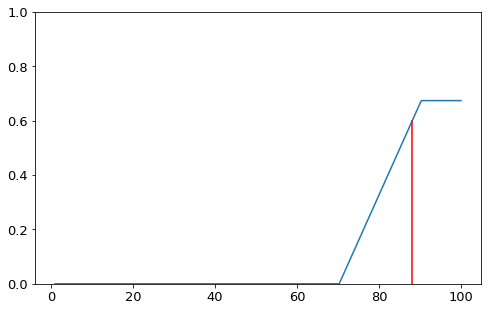

Charleston -> 13


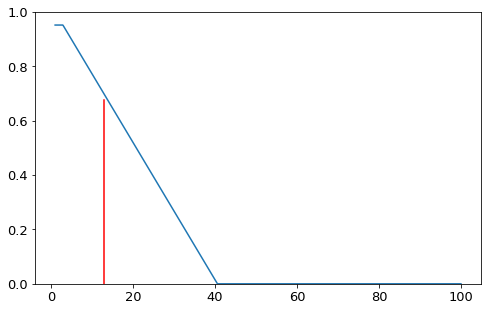

Vilnius -> 89


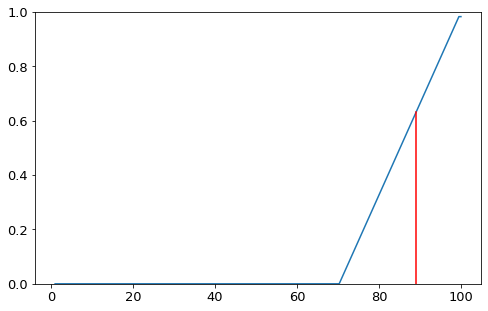

Nantes -> 89


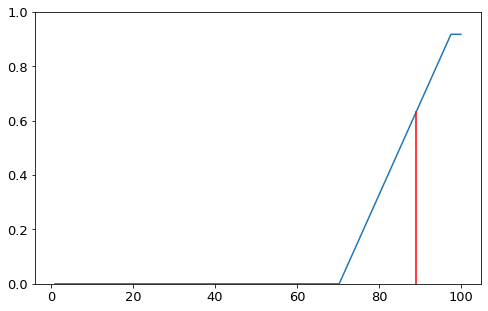

Los Angeles -> 16


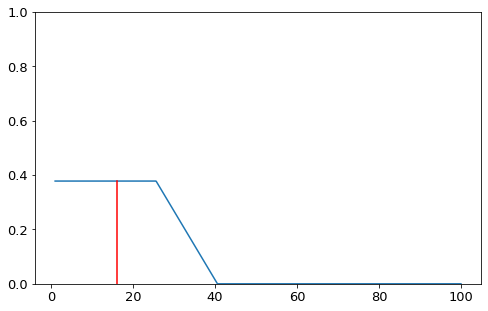

Rochester -> 54


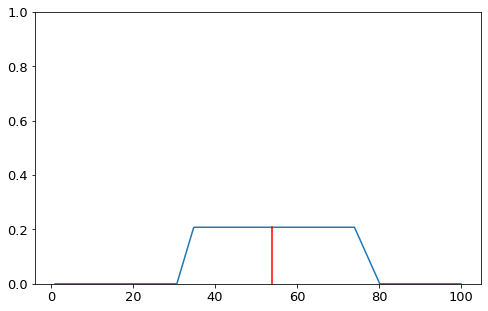

Christchurch -> 0


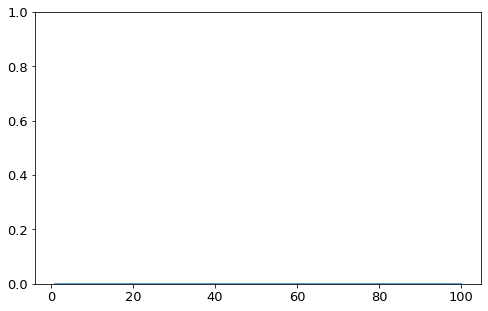

Edinburgh -> 89


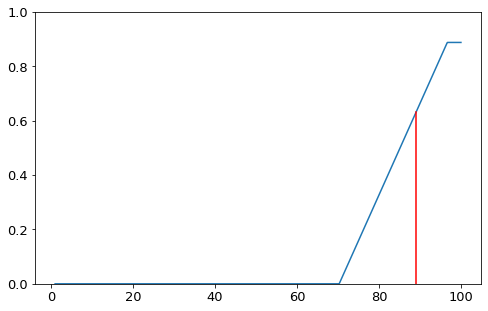

Milwaukee -> 18


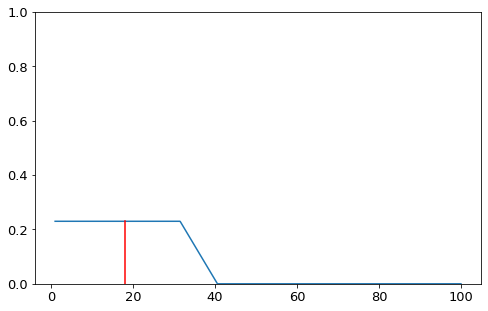

Madison -> 54


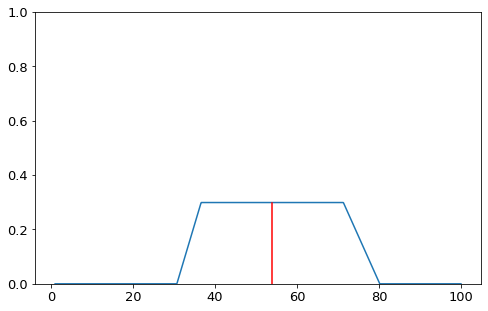

Ankara -> 89


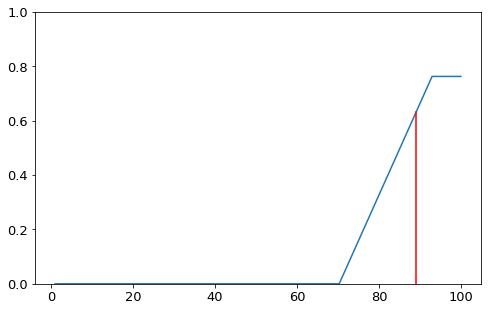

Brighton -> 0


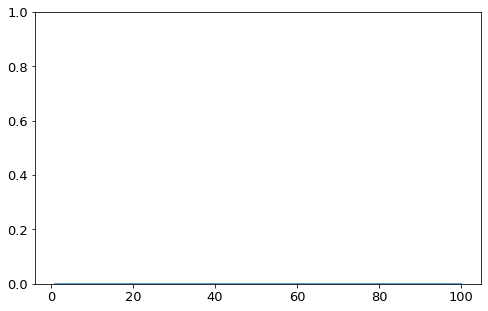

Mexico City -> 0


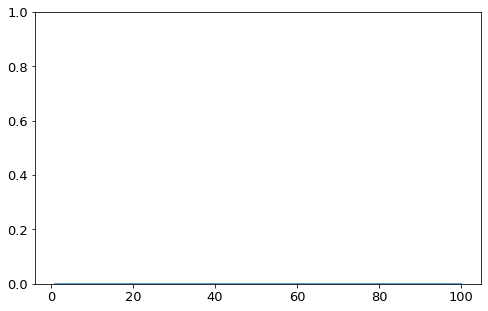

Boston -> 0


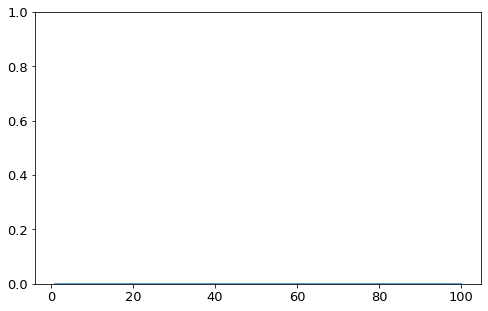

Copenhagen -> 87


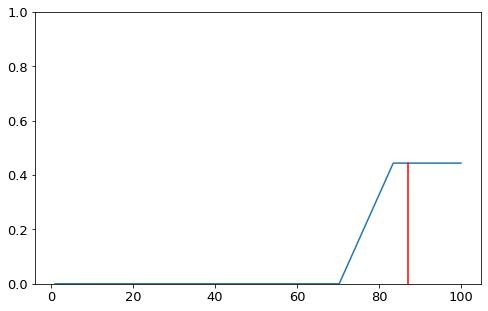

Birmingham -> 54


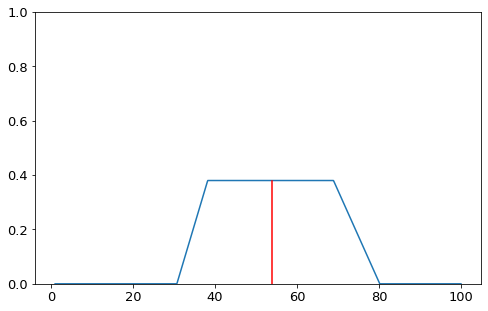

Dallas -> 19


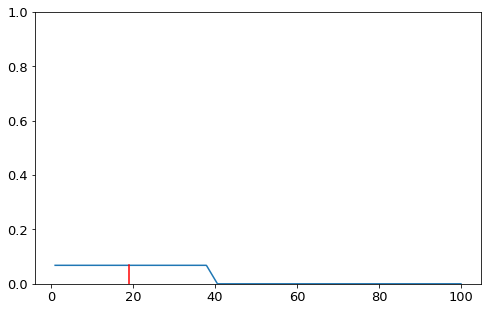

The Hague -> 77


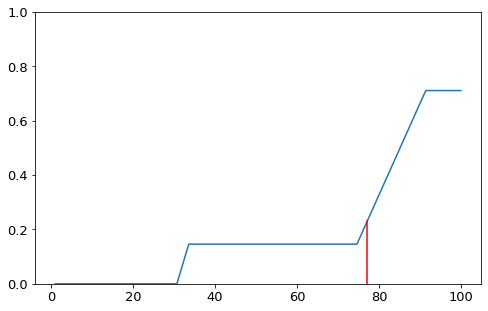

Richmond -> 53


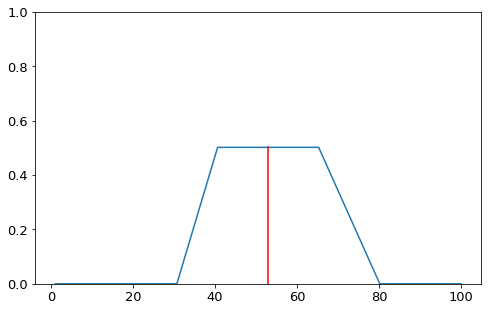

Bristol -> 87


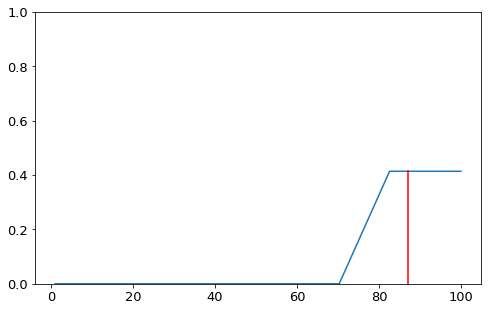

Guadalajara -> 0


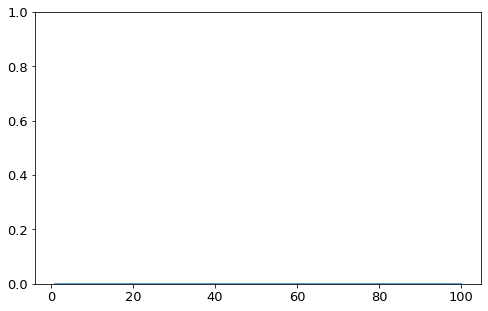

San Francisco Bay Area -> 0


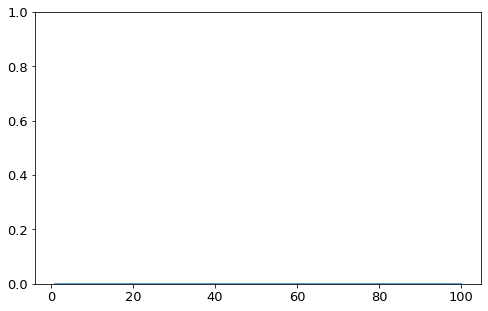

Cambridge -> 88


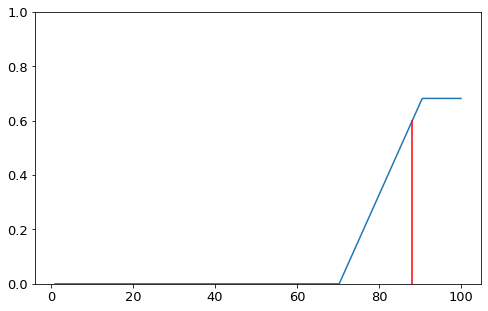

Atlanta -> 19


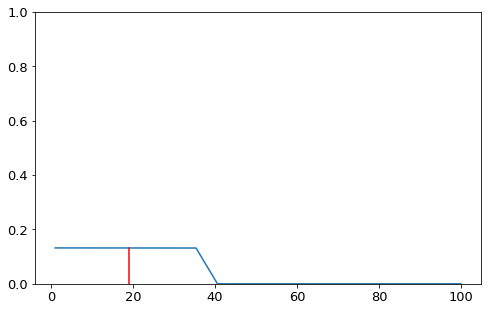

Nice -> 87


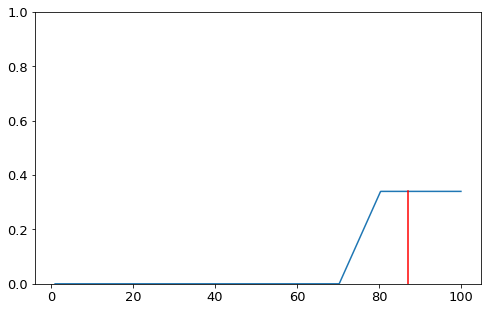

Zurich -> 0


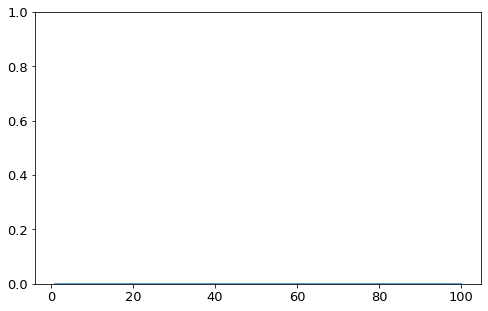

New Orleans -> 14


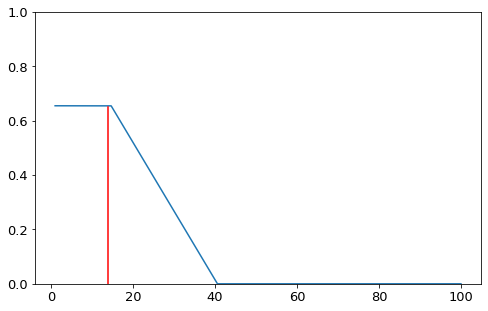

Cardiff -> 84


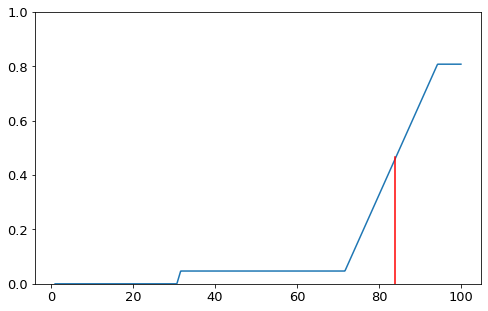

Sao Paulo -> 17


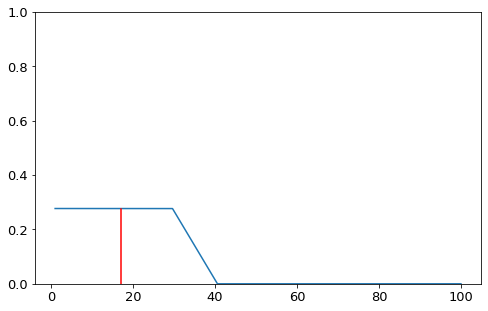

Reykjavik -> 0


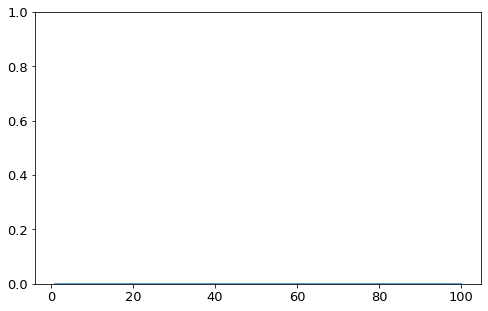

Phuket -> 19


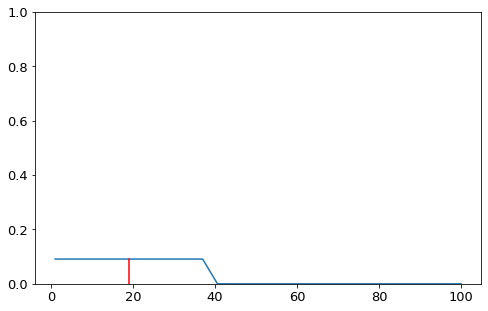

Bern -> 84


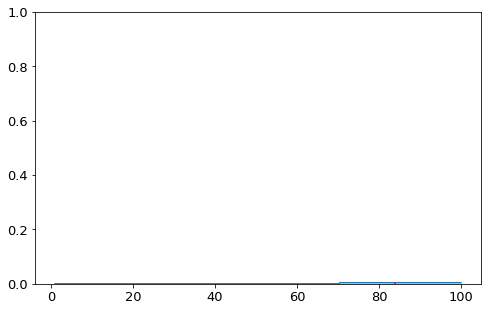

Melbourne -> 0


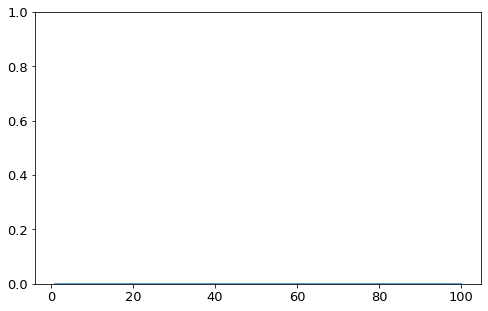

Montreal -> 53


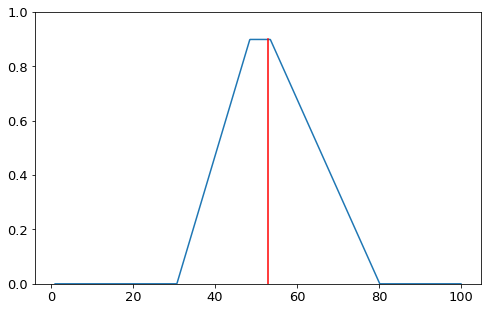

Dresden -> 89


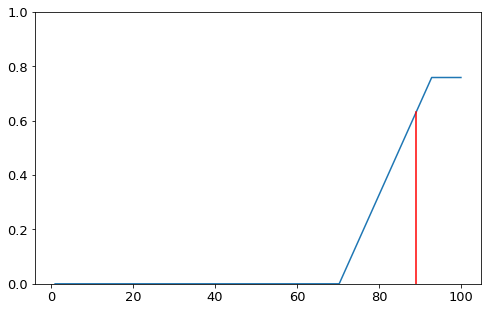

Delhi -> 54


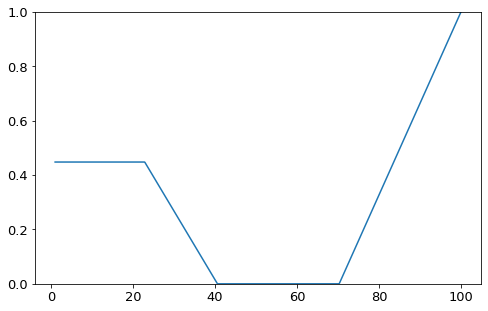

Charlotte -> 54


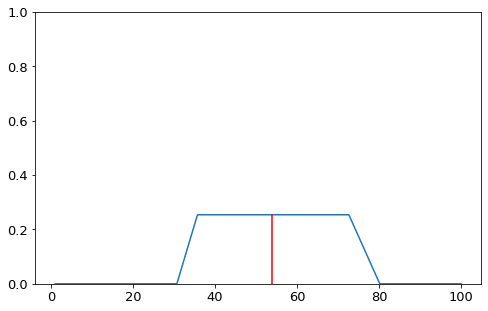

Phoenix -> 53


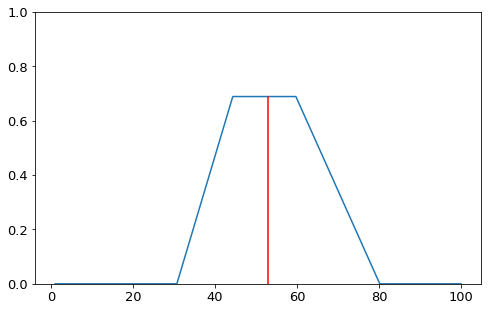

Almaty -> 89


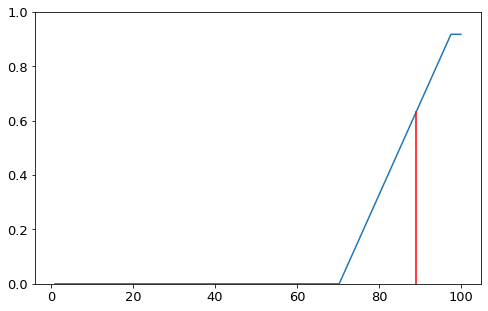

Athens -> 53


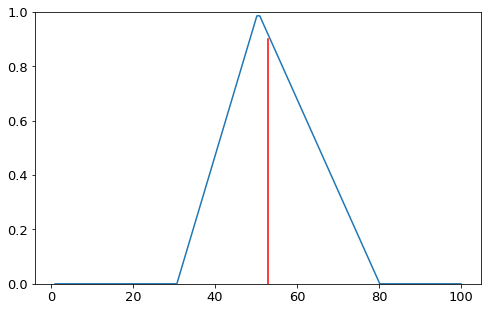

Ljubljana -> 0


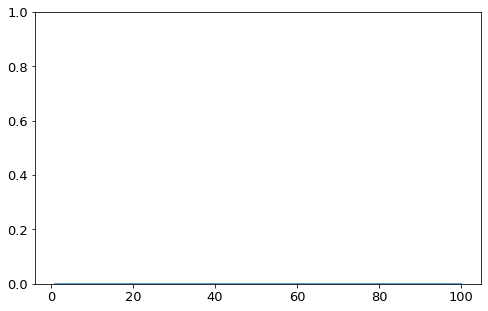

Leipzig -> 85


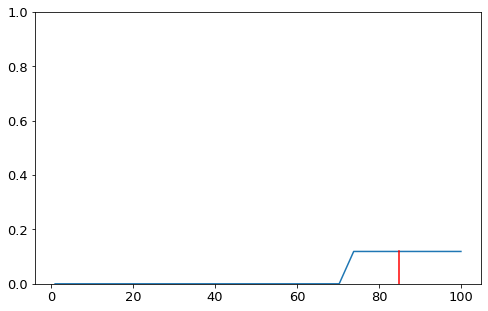

Vienna -> 88


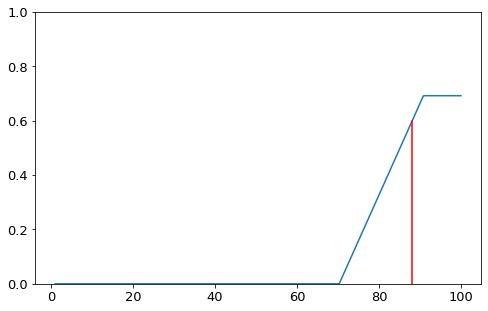

Birmingham -> 54


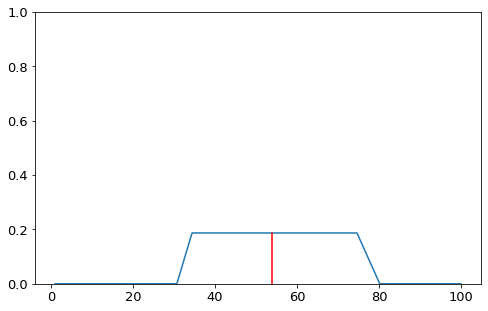

Kuala Lumpur -> 0


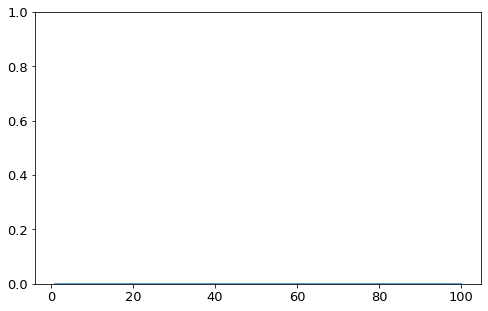

Innsbruck -> 86


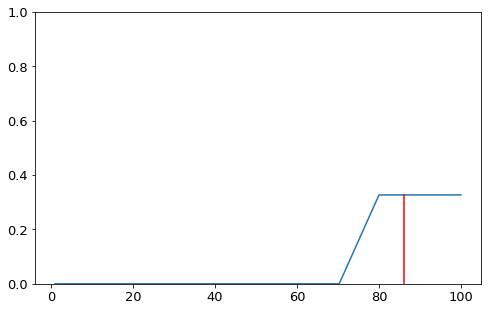

Buenos Aires -> 54


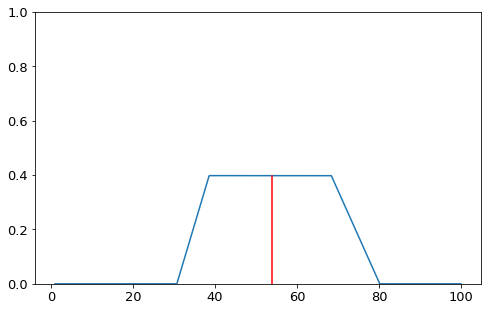

Indianapolis -> 54


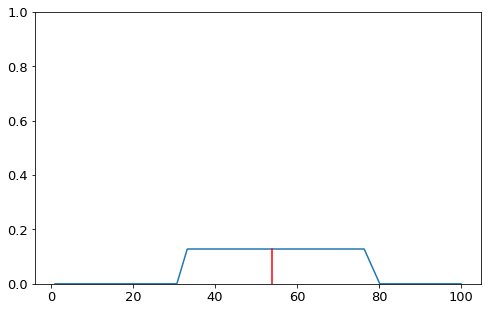

Winnipeg -> 54


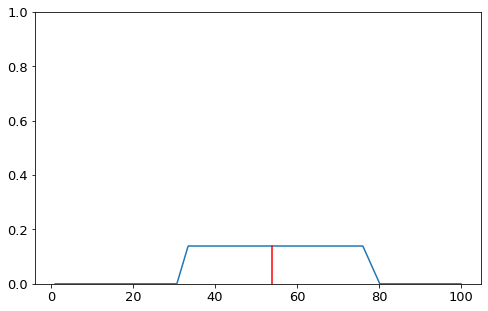

Cluj-Napoca -> 89


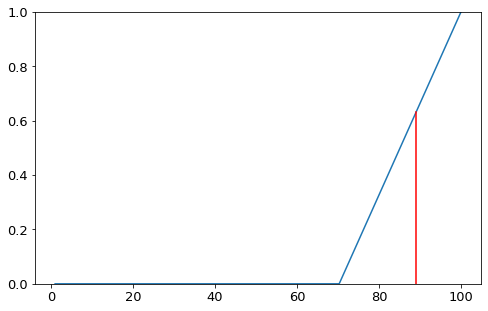

Austin -> 16


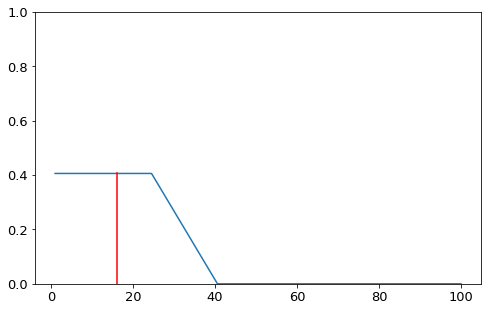

Tampere -> 0


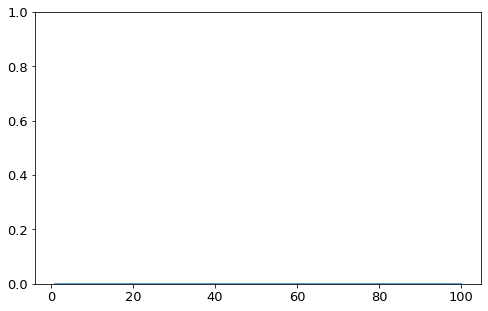

Saint Petersburg -> 89


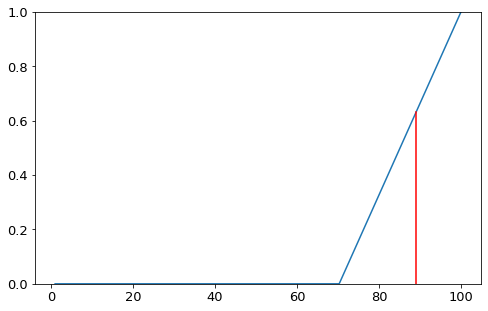

San Antonio -> 54


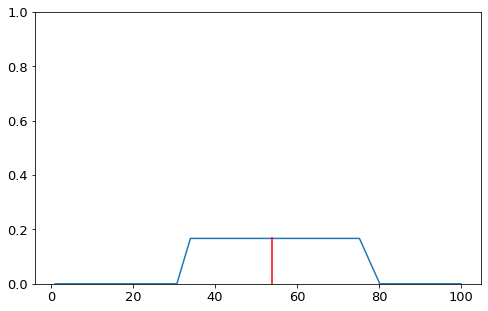

Minneapolis-Saint Paul -> 54


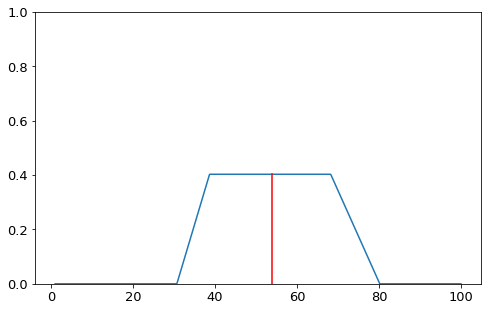

Bangkok -> 54


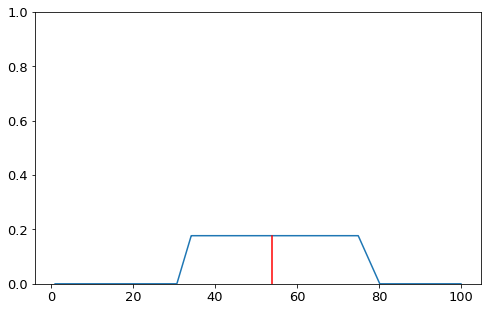

Brussels -> 0


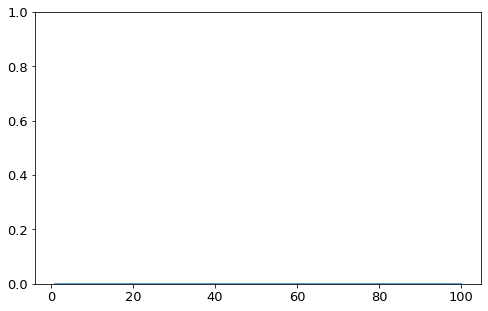

Gdansk -> 89


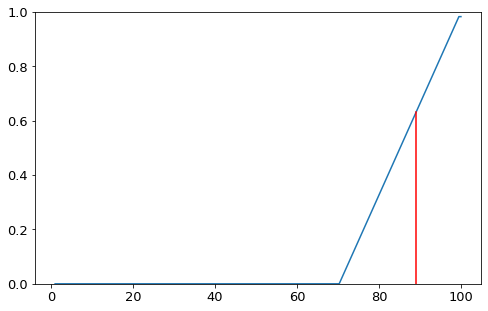

Auckland -> 18


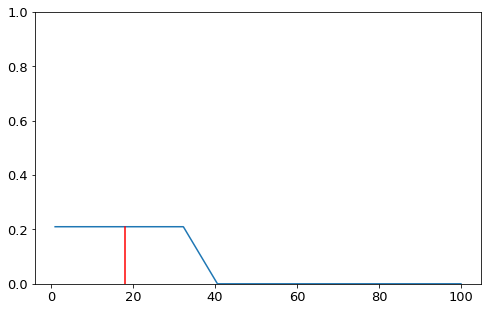

Uppsala -> 88


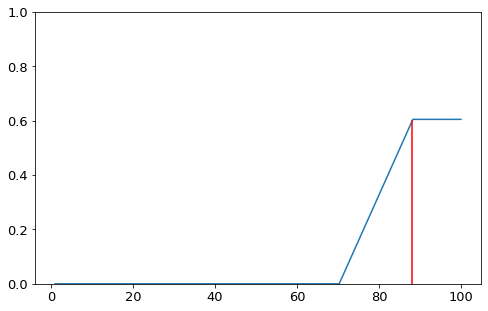

Doha -> 53


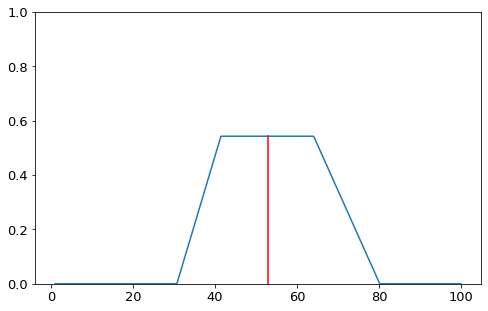

Jakarta -> 0


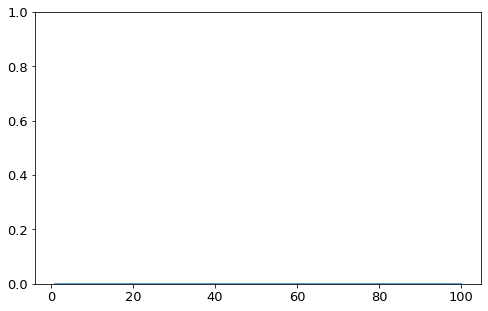

Bucharest -> 89


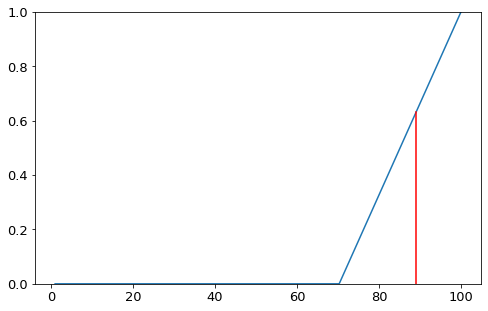

Glasgow -> 88


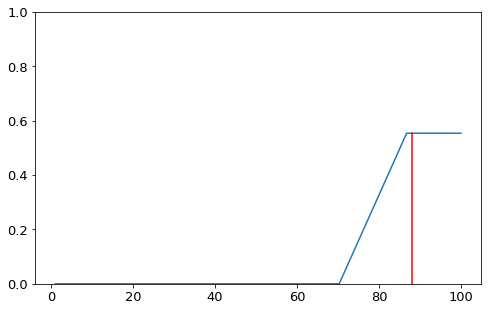

Aarhus -> 0


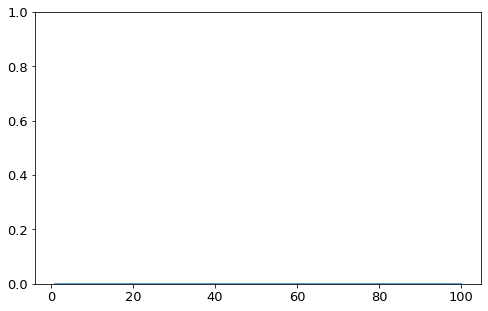

Las Vegas -> 54


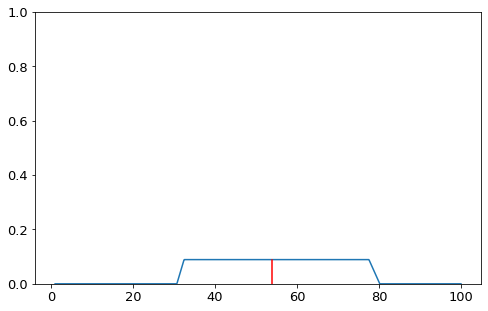

Lisbon -> 85


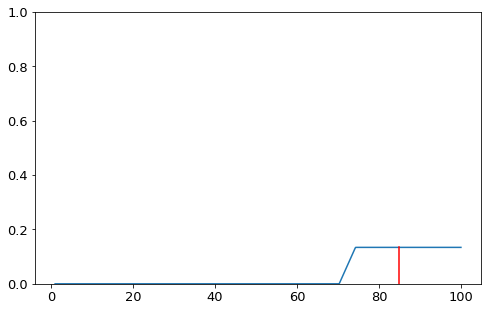

Rotterdam -> 89


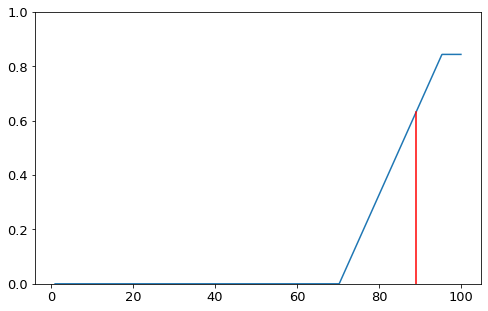

Des Moines -> 53


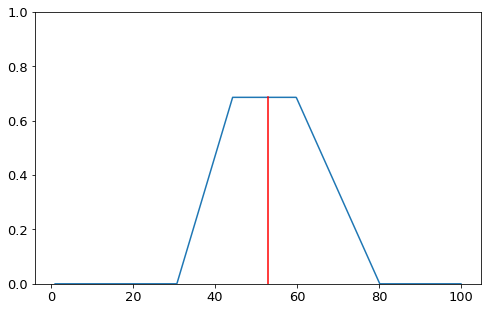

Beijing -> 54


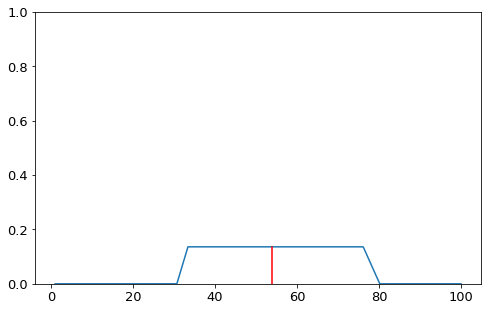

Belgrade -> 0


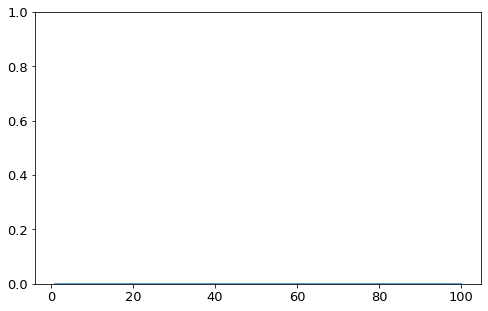

Tartu -> 89


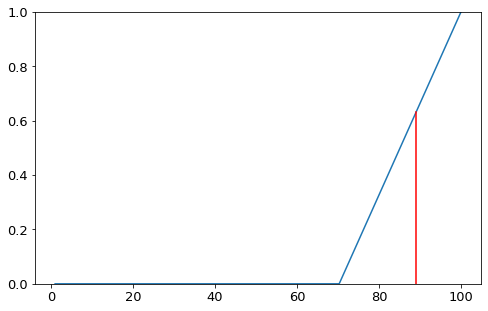

Belfast -> 86


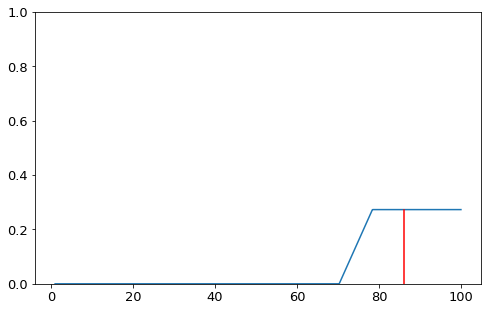

Budapest -> 89


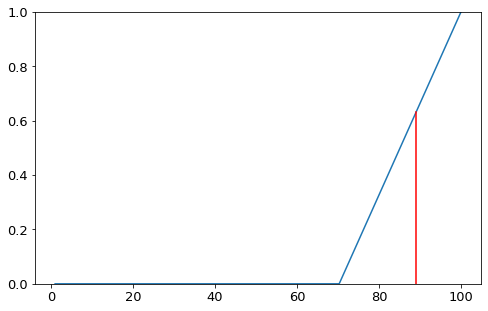

Anchorage -> 13


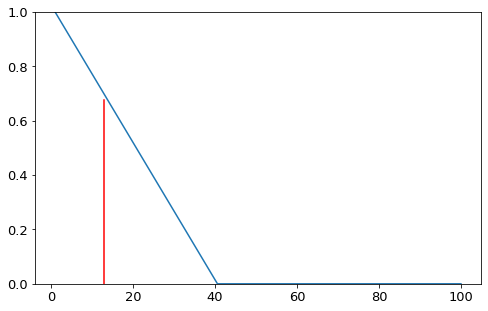

Nicosia -> 0


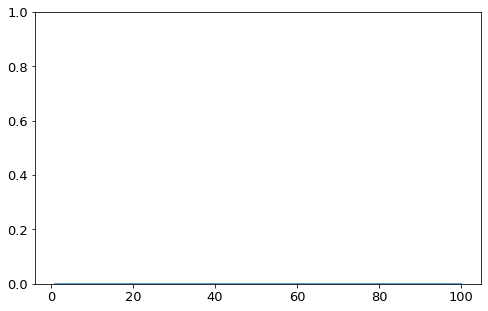

Miami -> 16


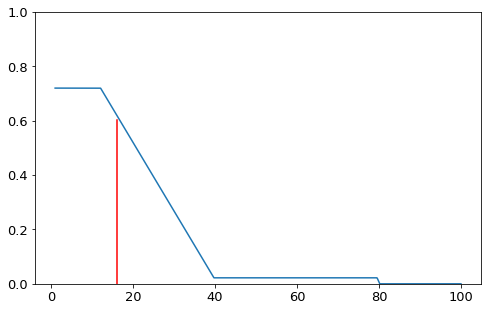

Chisinau -> 89


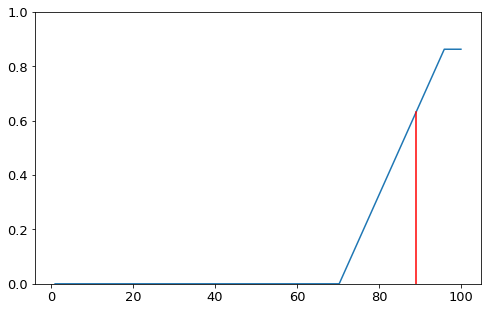

Pittsburgh -> 17


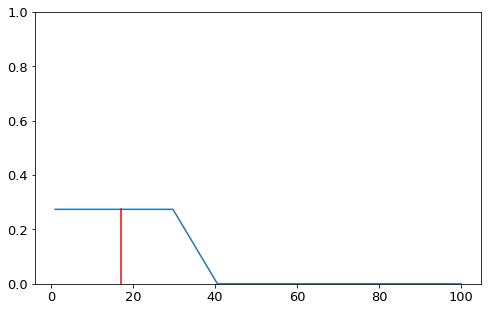

Cairo -> 0


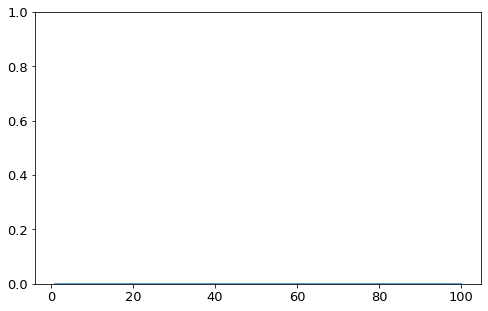

Philadelphia -> 15


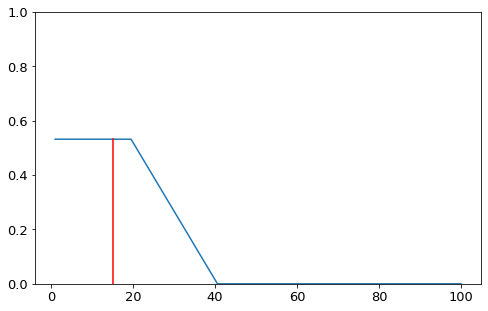

Detroit -> 53


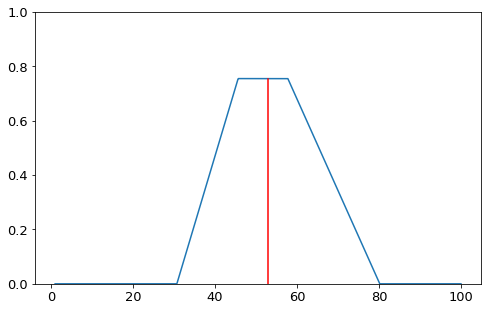

Manchester -> 54


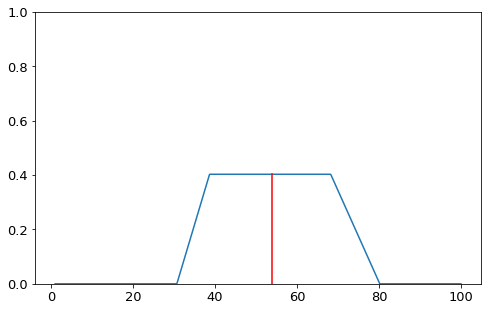

Tbilisi -> 89


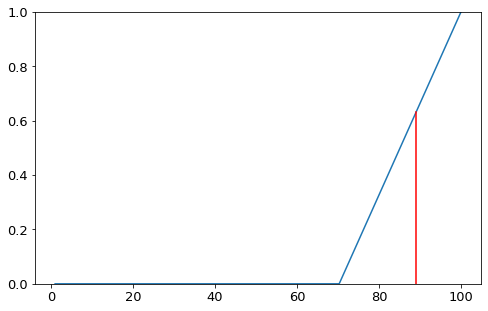

Bordeaux -> 88


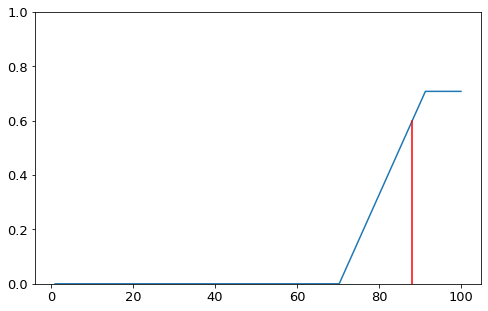

Luxembourg -> 86


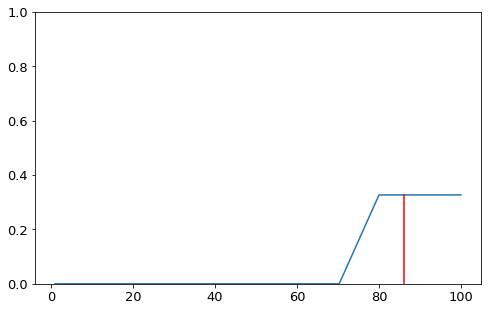

Riyadh -> 89


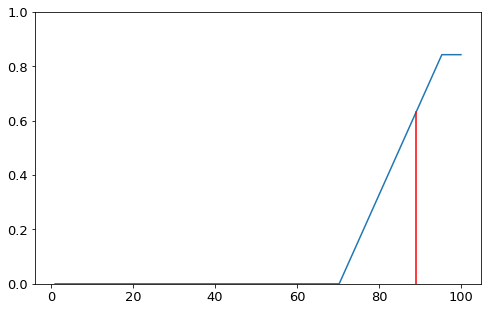

Porto Alegre -> 17


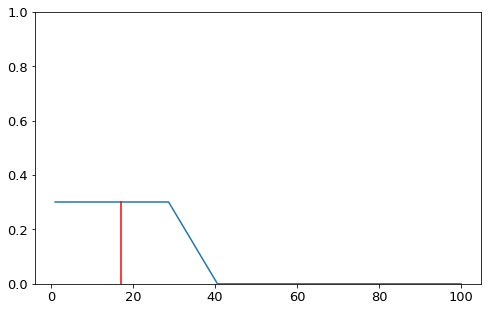

Orlando -> 54


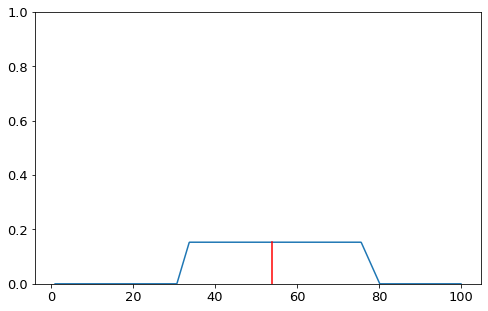

Bergen -> 0


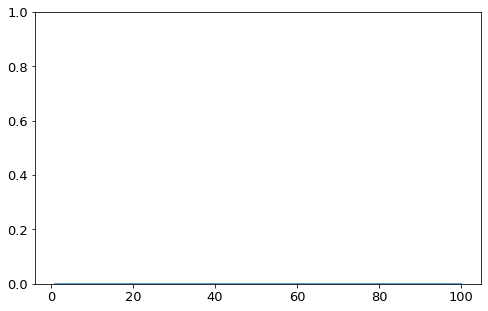

London -> 86


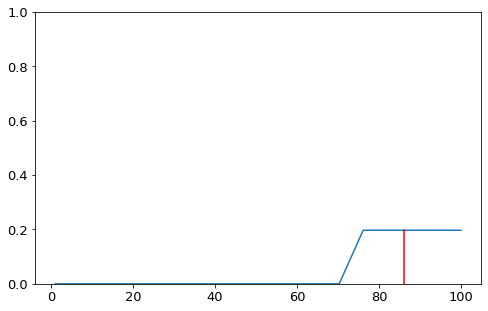

Beirut -> 35


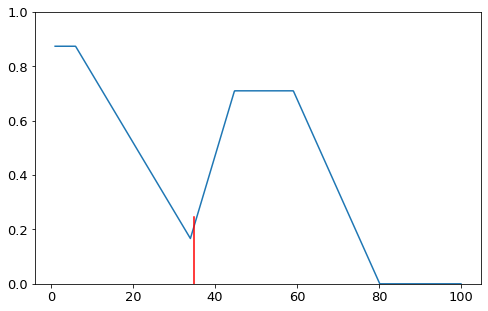

Florence -> 85


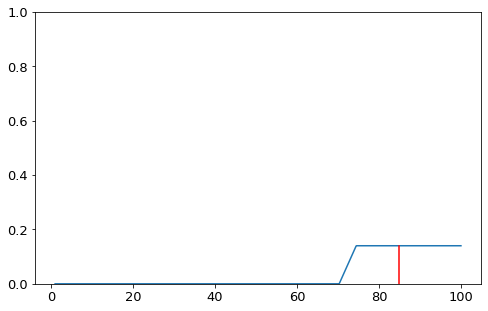

Rio De Janeiro -> 16


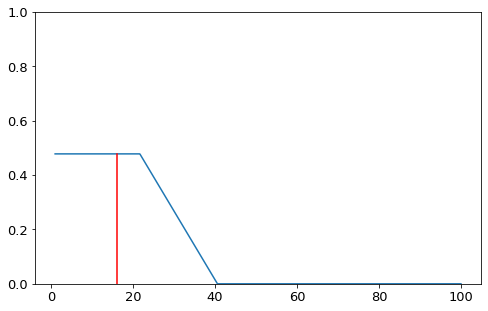

Taipei -> 84


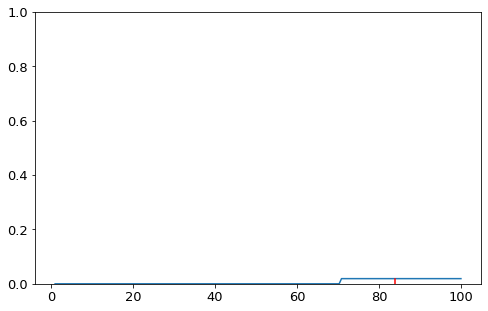

Curitiba -> 0


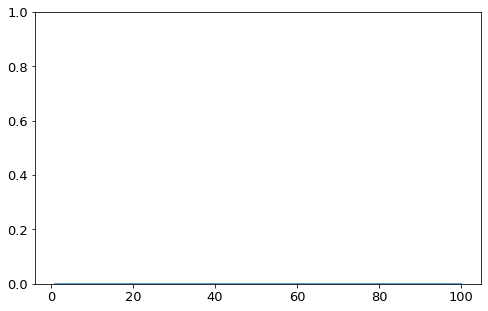

Kansas City -> 54


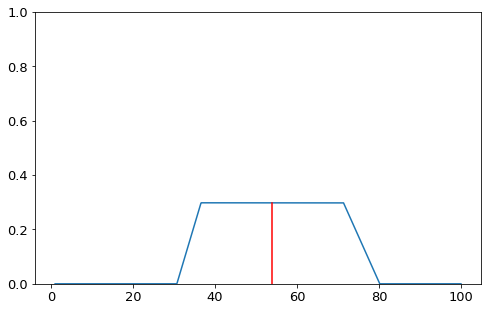

Florianopolis -> 18


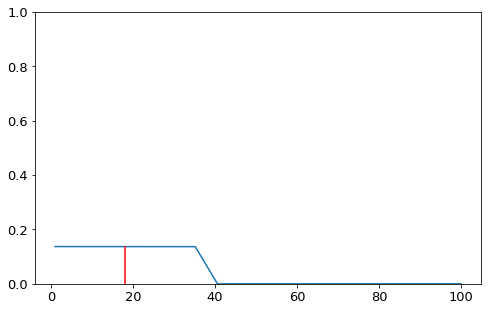

Tokyo -> 89


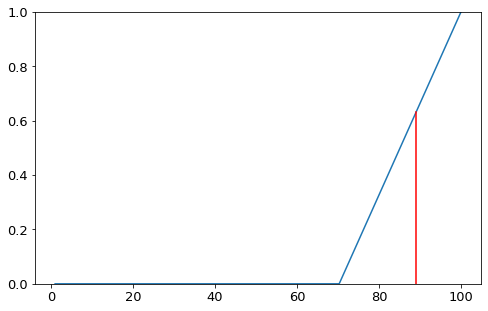

Raleigh -> 53


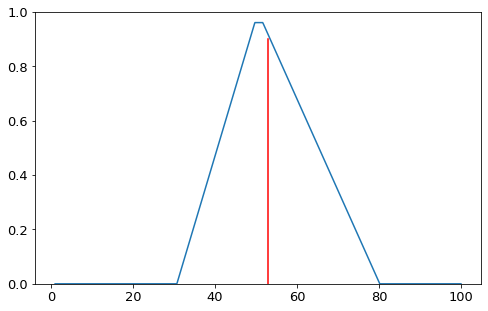

Brisbane -> 0


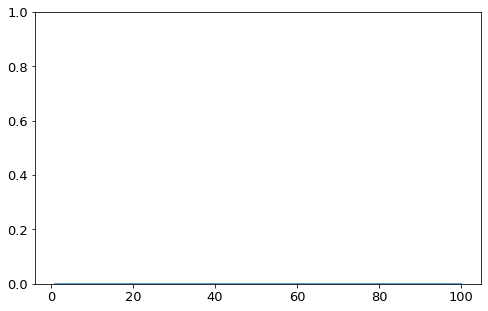

Hong Kong -> 87


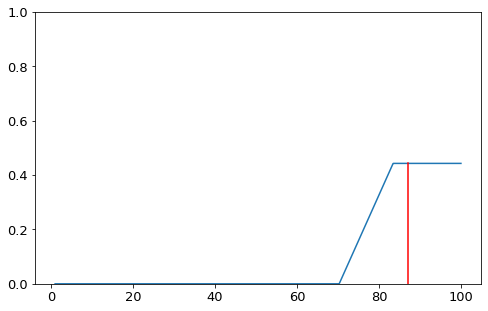

Honolulu -> 13


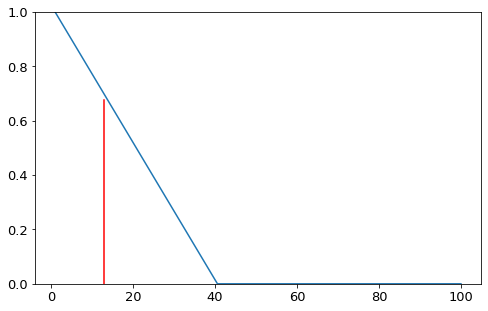

Riga -> 88


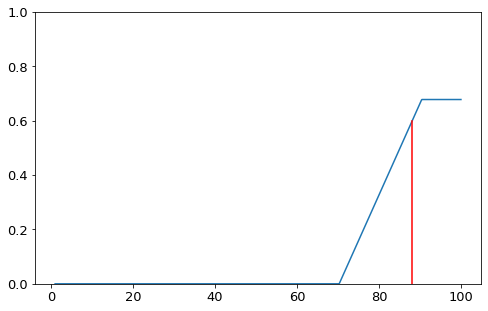

Oklahoma City -> 18


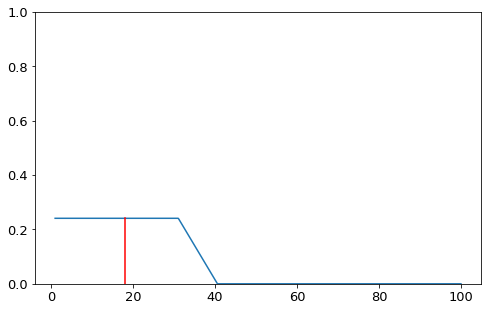

Boise -> 54


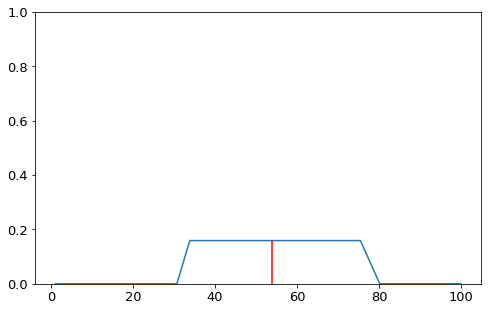

Oslo -> 85


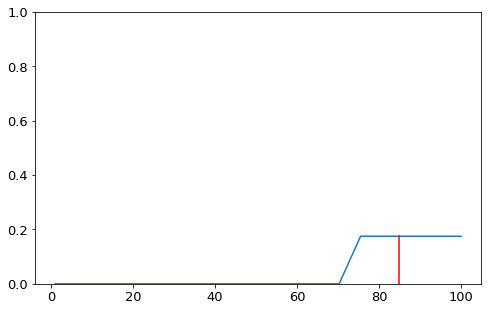

Denver -> 54


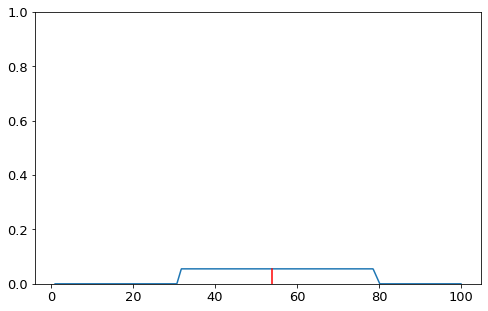

Eugene -> 53


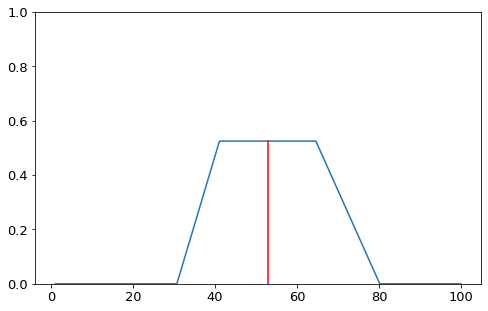

Istanbul -> 89


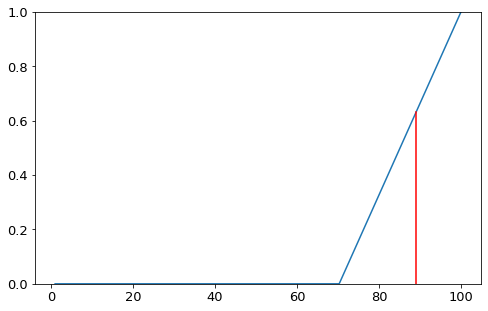

Perth -> 19


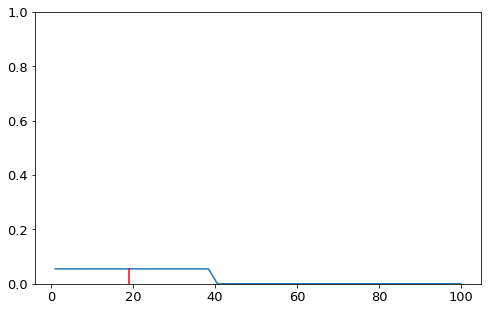

Stockholm -> 0


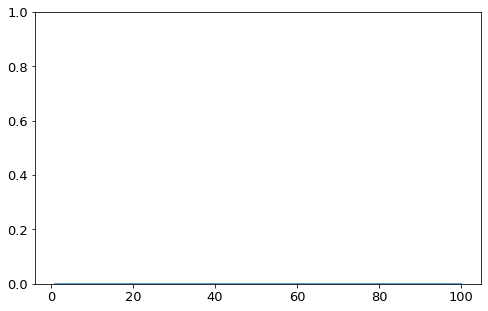

Grenoble -> 0


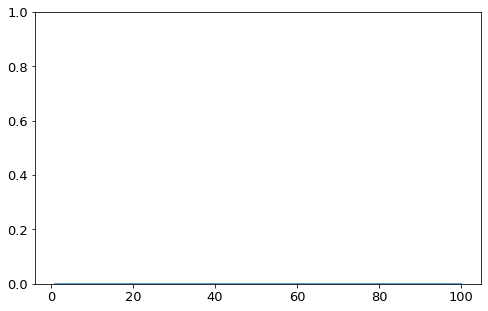

Cleveland -> 0


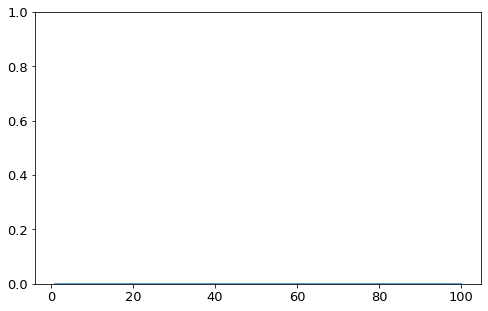

Quebec -> 88


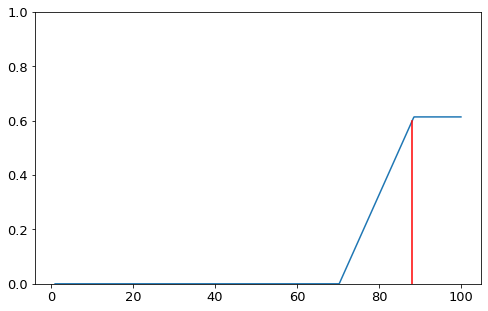

Liverpool -> 89


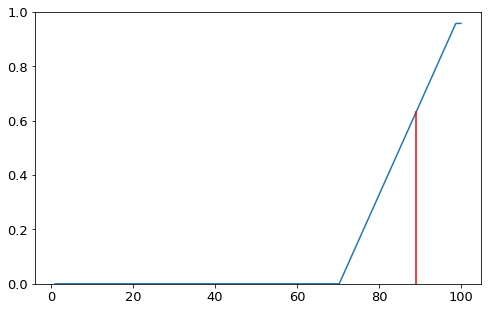

Dusseldorf -> 87


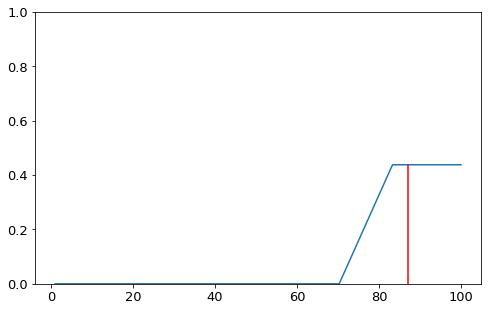

Rome -> 0


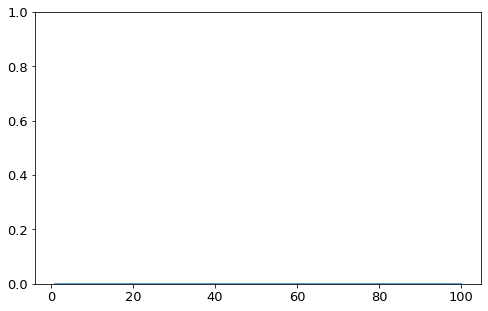

Tunis -> 89


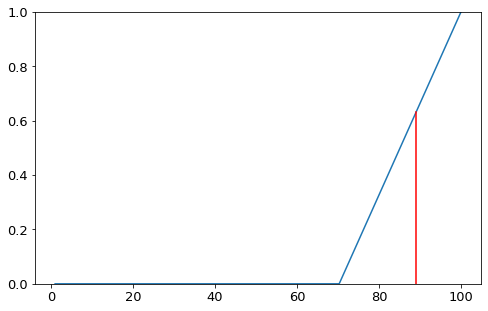

Jacksonville -> 54


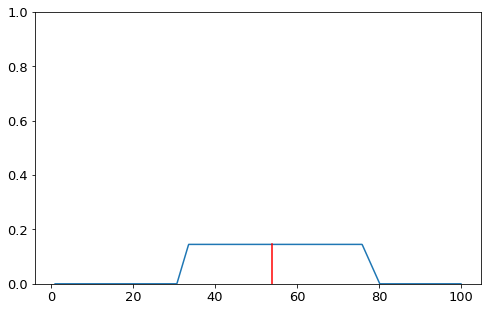

Seattle -> 16


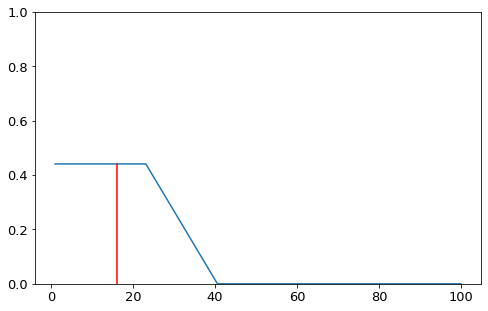

Cincinnati -> 54


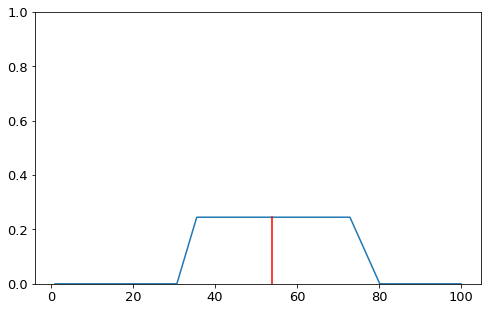

Gothenburg -> 54


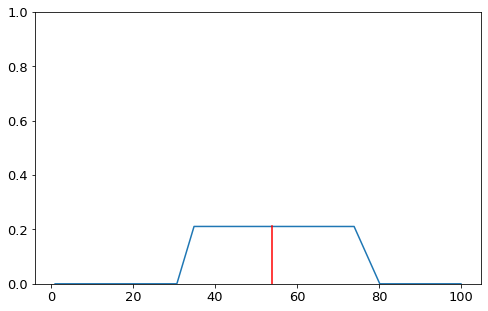

Wroclaw -> 83


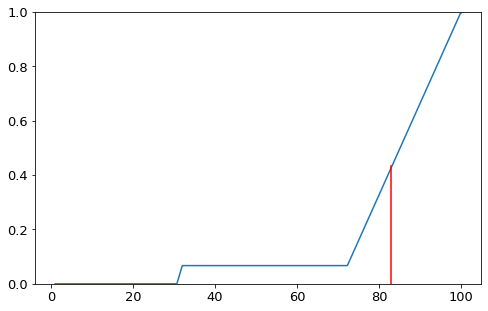

Osaka -> 89


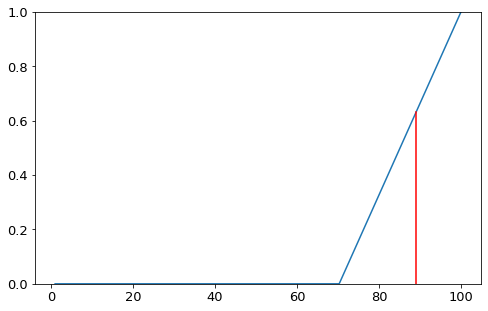

Ho Chi Minh City -> 53


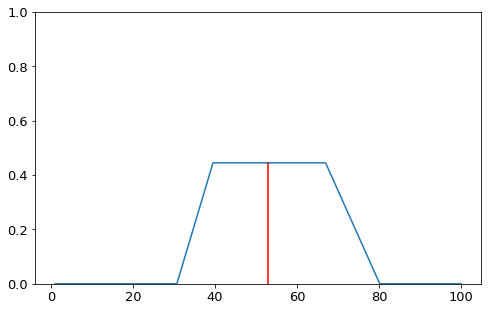

Helsinki -> 86


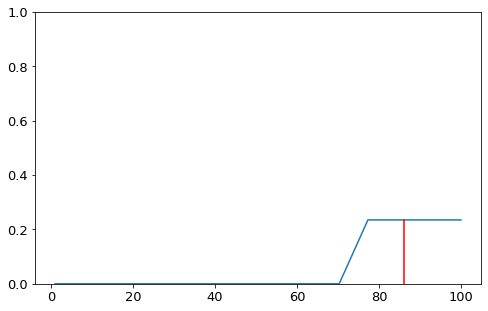

Porto -> 89


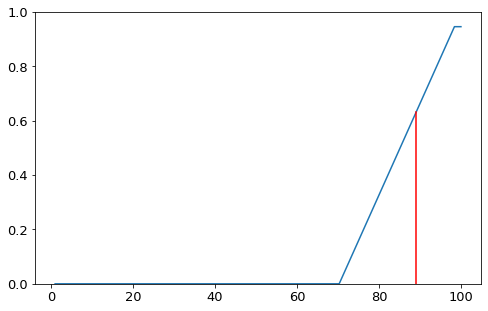

Eindhoven -> 88


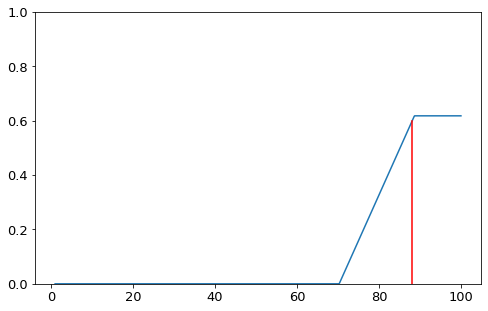

Bengaluru -> 43


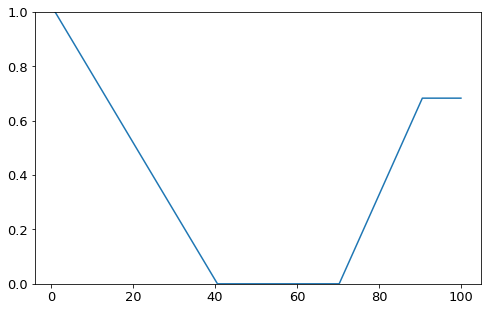

Buffalo -> 0


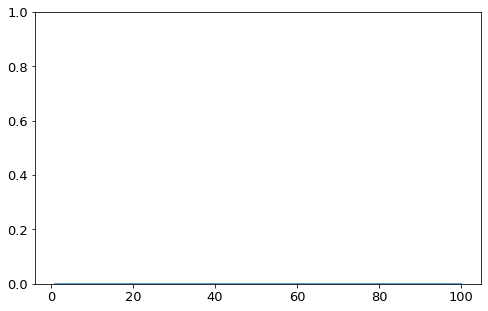

Vancouver -> 0


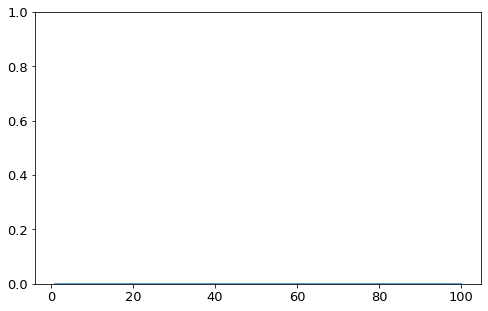

Wellington -> 0


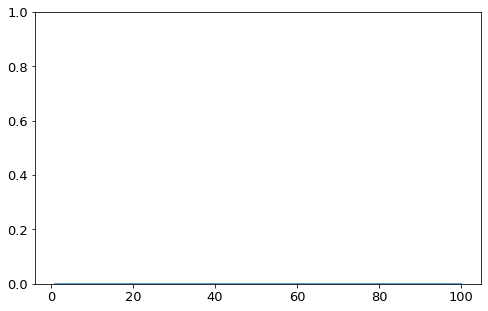

Oxford -> 87


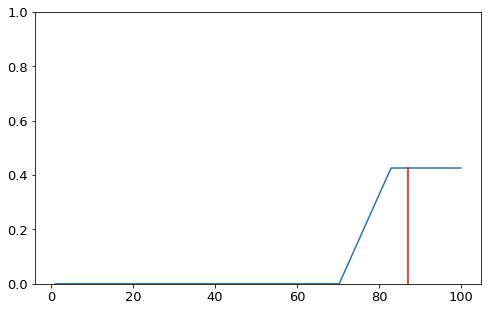

Edmonton -> 0


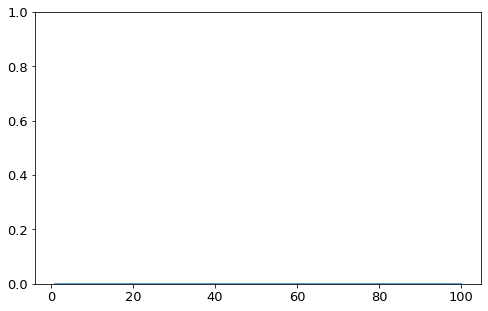

Paris -> 0


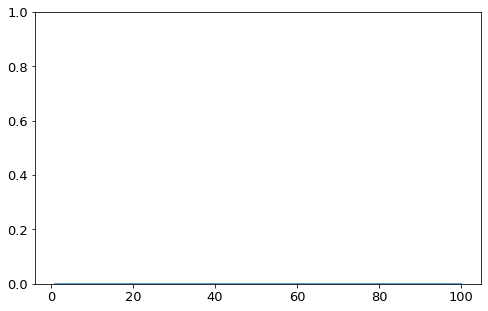

Frankfurt -> 53


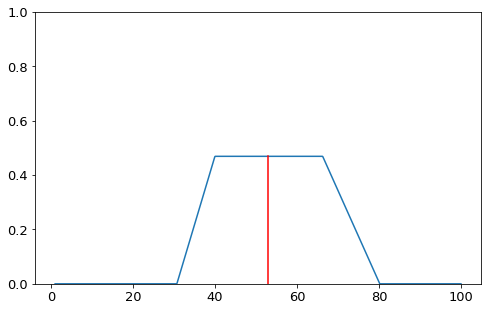

Munich -> 89


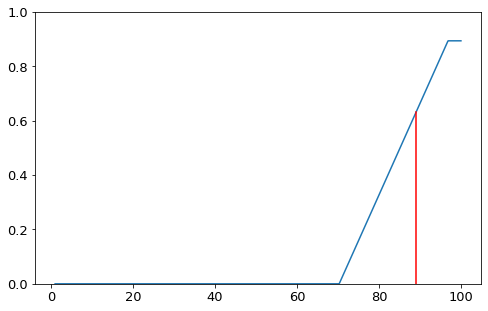

Sofia -> 89


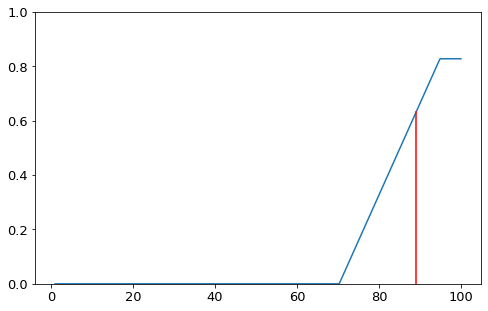

Columbus -> 54


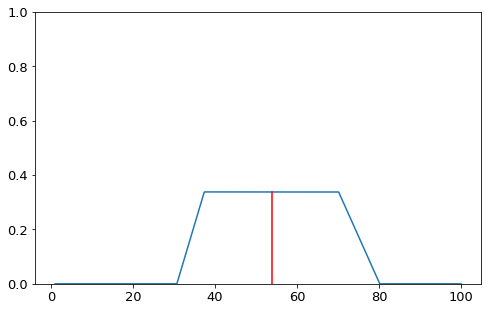

Tel Aviv -> 54


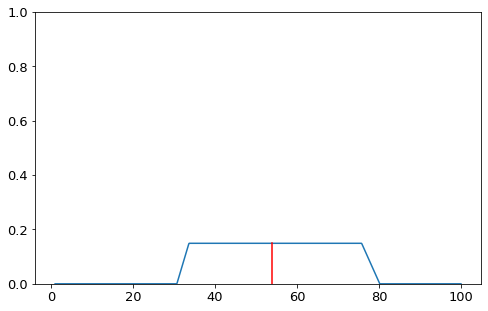

Adelaide -> 0


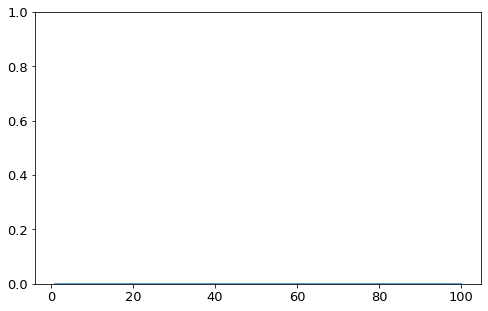

Prague -> 89


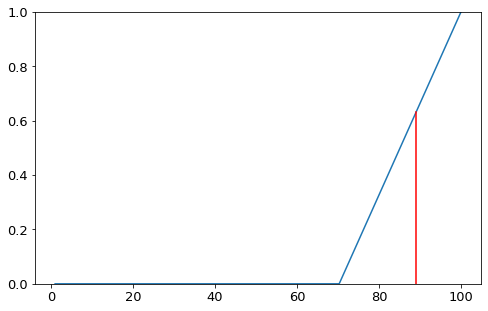

Hamburg -> 54


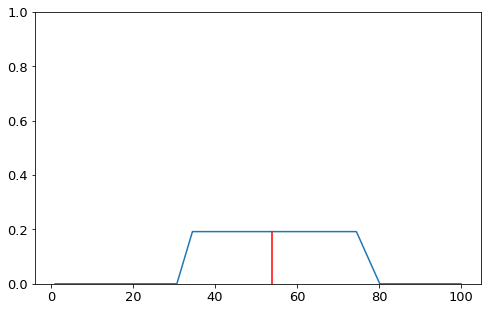

Brno -> 89


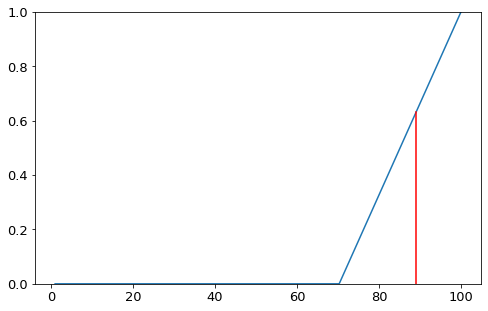

Galway -> 76


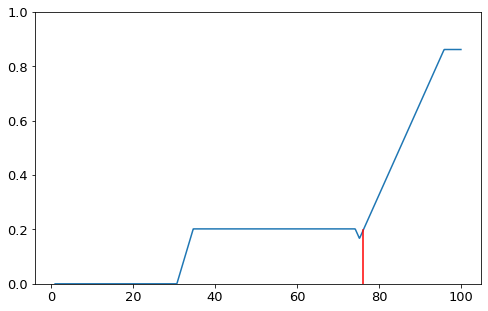

Tallinn -> 88


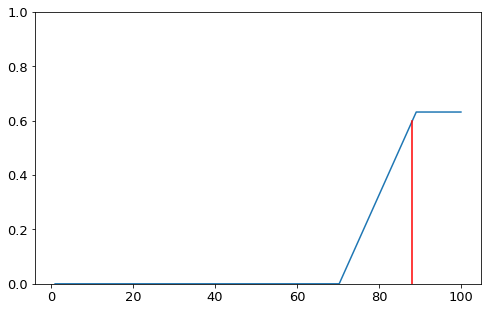

Asheville -> 54


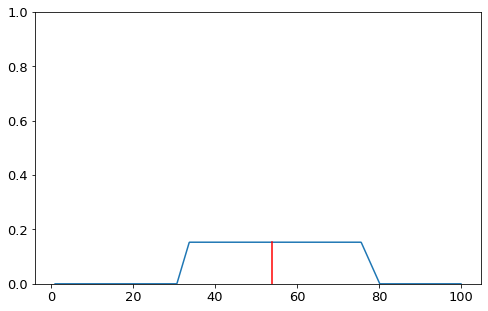

FOR NORM = ExtendedMangerNorm, DEFUZZIFICATION METHOD = centroid, THRESHOLD = 70


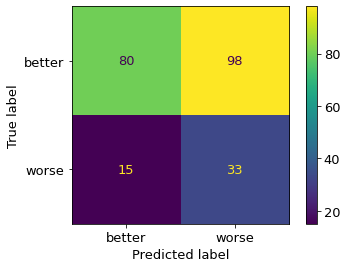

 > accuracy: 78.8%
 > recall: 70.8%
 > specificity: 86.7%
 > precision: 84.2%
----------------------------------------------------------------------------------


In [11]:
from itertools import product
import Modules.fuzzytesting as test
from Modules.fuzzytesting import FuzzyTest
import warnings
warnings.filterwarnings("ignore")
importlib.reload(test)
import Modules.fuzzysys as fsys
from Modules.norms import ZadehNorm
from Modules.membership_functions import TriangularFunction, TrapezoidalFunction
importlib.reload(fsys)
import Modules.rule as rule
from Modules.rule import RuleCondition as R
importlib.reload(rule)

from Modules.norms import ZadehNorm, ExtendedMangerNorm

Bad = 'Bad'
Average = 'Average'
Good = 'Good'

fuzzy = fsys.FuzzySystem()
fuzzy.add_antecedent('Housing', Bad, TrapezoidalFunction(0, 0, 0.3, 0.55))
fuzzy.add_antecedent('Housing', Average, TriangularFunction(0.5, 0.6, 0.7))
fuzzy.add_antecedent('Housing', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_antecedent('Cost of Living', Bad, TrapezoidalFunction(0, 0, 0.25, 0.47))
fuzzy.add_antecedent('Cost of Living', Average, TriangularFunction(0.4, 0.55, 0.7))
fuzzy.add_antecedent('Cost of Living', Good, TrapezoidalFunction(0.6, 0.75, 1, 1))

fuzzy.add_antecedent('Safety', Bad, TrapezoidalFunction(0, 0, 0.3, 0.6))
fuzzy.add_antecedent('Safety', Average, TriangularFunction(0.5, 0.6, 0.7))
fuzzy.add_antecedent('Safety', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_antecedent('Healthcare', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Healthcare', Average, TriangularFunction(0.4, 0.6, 0.8))
fuzzy.add_antecedent('Healthcare', Good, TrapezoidalFunction(0.7, 0.85, 1, 1))

fuzzy.add_antecedent('Travel Connectivity', Bad, TrapezoidalFunction(0, 0, 0.14, 0.2))
fuzzy.add_antecedent('Travel Connectivity', Average, TrapezoidalFunction(0.15, 0.25, 0.33, 0.4))
fuzzy.add_antecedent('Travel Connectivity', Good, TrapezoidalFunction(0.35, 0.5, 1, 1))

fuzzy.add_antecedent('Commute', Bad, TrapezoidalFunction(0, 0, 0.46, 0.7))
fuzzy.add_antecedent('Commute', Average, TrapezoidalFunction(0.6, 0.67, 0.74, 0.8))
fuzzy.add_antecedent('Commute', Good, TrapezoidalFunction(0.7, 0.8, 1, 1))

fuzzy.add_antecedent('Education', Bad, TrapezoidalFunction(0, 0, 0.2, 0.4))
fuzzy.add_antecedent('Education', Average, TriangularFunction(0.3, 0.42, 0.5))
fuzzy.add_antecedent('Education', Good, TrapezoidalFunction(0.4, 0.7, 1, 1))

fuzzy.add_antecedent('Environmental Quality', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Environmental Quality', Average, TriangularFunction(0.45, 0.52, 0.7))
fuzzy.add_antecedent('Environmental Quality', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_antecedent('Economy', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Economy', Average, TriangularFunction(0.4, 0.5, 0.6))
fuzzy.add_antecedent('Economy', Good, TrapezoidalFunction(0.5, 0.75, 1, 1))

fuzzy.add_antecedent('Taxation', Bad, TrapezoidalFunction(0, 0, 0.26, 0.4))
fuzzy.add_antecedent('Taxation', Average, TrapezoidalFunction(0.3, 0.37, 0.44, 0.5))
fuzzy.add_antecedent('Taxation', Good, TrapezoidalFunction(0.4, 0.6, 1, 1))

fuzzy.add_antecedent('Internet Access', Bad, TrapezoidalFunction(0, 0, 0.2, 0.4))
fuzzy.add_antecedent('Internet Access', Average, TriangularFunction(0.3, 0.45, 0.6))
fuzzy.add_antecedent('Internet Access', Good, TrapezoidalFunction(0.5, 0.75, 1, 1))

fuzzy.add_antecedent('Leisure & Culture', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Leisure & Culture', Average, TriangularFunction(0.4, 0.52, 0.7))
fuzzy.add_antecedent('Leisure & Culture', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_rule((R('Housing', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Housing', Good) & R('Cost of Living', Good) & R('Healthcare', Good)) | (R('Housing', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Housing', Good) & R('Safety', Good) & R('Healthcare', Good)) | (R('Housing', Good) & R('Safety', Good) & R('Travel Connectivity', Good)) | (R('Housing', Good) & R('Healthcare', Good) & R('Travel Connectivity', Good)) | (R('Healthcare', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Travel Connectivity', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Housing', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Healthcare', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Safety', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Healthcare', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Travel Connectivity', Good) & R('Healthcare', Good) & R('Safety', Good)), Good)
fuzzy.add_rule((R('Housing', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Housing', Average) & R('Cost of Living', Average) & R('Healthcare', Average)) | (R('Housing', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Housing', Average) & R('Safety', Average) & R('Healthcare', Average)) | (R('Housing', Average) & R('Safety', Average) & R('Travel Connectivity', Average)) | (R('Housing', Average) & R('Healthcare', Average) & R('Travel Connectivity', Average)) | (R('Healthcare', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Travel Connectivity', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Housing', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Healthcare', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Safety', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Healthcare', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Travel Connectivity', Average) & R('Healthcare', Average) & R('Safety', Average)), Average)
fuzzy.add_rule((R('Housing', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Housing', Bad) & R('Cost of Living', Bad) & R('Healthcare', Bad)) | (R('Housing', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Housing', Bad) & R('Safety', Bad) & R('Healthcare', Bad)) | (R('Housing', Bad) & R('Safety', Bad) & R('Travel Connectivity', Bad)) | (R('Housing', Bad) & R('Healthcare', Bad) & R('Travel Connectivity', Bad)) | (R('Healthcare', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Travel Connectivity', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Housing', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Healthcare', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Safety', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Healthcare', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Travel Connectivity', Bad) & R('Healthcare', Bad) & R('Safety', Bad)), Bad)
fuzzy.add_rule(((((R('Housing', Good) & ~R('Cost of Living', Good) & ~R('Safety', Good) & ~R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & R('Cost of Living', Good) & ~R('Safety', Good) & ~R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & ~R('Cost of Living', Good) & R('Safety', Good) & ~R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & ~R('Cost of Living', Good) & ~R('Safety', Good) & R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & ~R('Cost of Living', Good) & ~R('Safety', Good) & ~R('Healthcare', Good) & R('Travel Connectivity', Good))) & ((R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Leisure & Culture', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Education', Good) & R('Leisure & Culture', Good) & R('Environmental Quality', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Leisure & Culture', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Leisure & Culture', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Environmental Quality', Good) & R('Leisure & Culture', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Leisure & Culture', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Internet Access', Good) & R('Leisure & Culture', Good) & R('Taxation', Good)) & (R('Commute', Good) & R('Education', Good) & R('Internet Access', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Education', Good) & R('Leisure & Culture', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Internet Access', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Internet Access', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Leisure & Culture', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Internet Access', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Internet Access', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good))))), Good)
fuzzy.add_rule(((((R('Housing', Average) & ~R('Cost of Living', Average) & ~R('Safety', Average) & ~R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & R('Cost of Living', Average) & ~R('Safety', Average) & ~R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & ~R('Cost of Living', Average) & R('Safety', Average) & ~R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & ~R('Cost of Living', Average) & ~R('Safety', Average) & R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & ~R('Cost of Living', Average) & ~R('Safety', Average) & ~R('Healthcare', Average) & R('Travel Connectivity', Average))) & ((R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Leisure & Culture', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Education', Average) & R('Leisure & Culture', Average) & R('Environmental Quality', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Leisure & Culture', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Leisure & Culture', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Environmental Quality', Average) & R('Leisure & Culture', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Leisure & Culture', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Internet Access', Average) & R('Leisure & Culture', Average) & R('Taxation', Average)) & (R('Commute', Average) & R('Education', Average) & R('Internet Access', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Education', Average) & R('Leisure & Culture', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Internet Access', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Internet Access', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Leisure & Culture', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Internet Access', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Internet Access', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average))))), Average)
fuzzy.add_rule(((((R('Housing', Bad) & ~R('Cost of Living', Bad) & ~R('Safety', Bad) & ~R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & R('Cost of Living', Bad) & ~R('Safety', Bad) & ~R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & ~R('Cost of Living', Bad) & R('Safety', Bad) & ~R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & ~R('Cost of Living', Bad) & ~R('Safety', Bad) & R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & ~R('Cost of Living', Bad) & ~R('Safety', Bad) & ~R('Healthcare', Bad) & R('Travel Connectivity', Bad))) & ((R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Leisure & Culture', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Education', Bad) & R('Leisure & Culture', Bad) & R('Environmental Quality', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Leisure & Culture', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Leisure & Culture', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Environmental Quality', Bad) & R('Leisure & Culture', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Leisure & Culture', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Internet Access', Bad) & R('Leisure & Culture', Bad) & R('Taxation', Bad)) & (R('Commute', Bad) & R('Education', Bad) & R('Internet Access', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Leisure & Culture', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Internet Access', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Internet Access', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Leisure & Culture', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Internet Access', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Internet Access', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad))))), Bad)

fuzzy.add_consequent(Bad, TriangularFunction(0, 0, 0.4))
fuzzy.add_consequent(Average, TriangularFunction(0.3, 0.5, 0.8))
fuzzy.add_consequent(Good, TriangularFunction(0.7, 1, 1))

fuzzy.display_antecedents()
fuzzy.display_consequents()

fuzzy_test = FuzzyTest(norm=ExtendedMangerNorm(), defuzzification_method='centroid')
fuzzy_test.run(fuzzy, pd.concat([a, b]), show_confusion_matrix=True, display=True)